#############################################
# Prerequisites - Load Libraries

In [125]:
source('MS0_Libraries.r')

###############################################
# Preqrequisites Configurations & Parameters

In [126]:
data_path = '../data/current'

In [127]:
result_path = '../results/current'

In [128]:
data_path

[1] "../data/current"

In [129]:
libraries = c('L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'L10','L11', 'L12', 'L13', 'L14')

In [130]:
### Data Frame for saving rand index

In [131]:

rand_index_results= data.frame()

########################################
# Prerequisites Data Loading

## Data from obs matrices

In [132]:
data_for_analysis_list = list()

In [133]:
variants = c('V1_Singlet')

In [134]:
for (i in variants){
    data_name = paste ( data_path, '/analysis/B/B3_Obs_Singlet_processed_rna.csv', sep = '')
    print(data_name)
    print(tail(file.info(data_name)$ctime))
    data_for_analysis_list[[i]] = read.csv ( data_name)
    }

[1] "../data/current/analysis/B/B3_Obs_Singlet_processed_rna.csv"
[1] "2023-01-21 11:55:49 CET"


In [135]:
#data_for_analysis

In [136]:
head(data_for_analysis_list[[1]])

X                     nCount_HTO nFeature_HTO nCount_RNA nFeature_RNA
1 AAACCCACATACAGGG-1-L1 1574       7             3947      1232        
2 AAACCCACATGACTTG-1-L1  379       7             5871      1890        
3 AAACCCAGTCATCAGT-1-L1  421       7             3889      1297        
4 AAACCCAGTGGTAATA-1-L1  478       7             5094      1327        
5 AAACCCATCATCACAG-1-L1  851       7            17480      2363        
6 AAACCCATCGATGGAG-1-L1  473       7             4839      1511        
  percent_mt HTO_maxID HTO_secondID HTO_margin HTO_classification ⋯
1 7.980745   9.1       1.1          2.2530478  9.1                ⋯
2 7.256004   9.1       7.1          0.9431934  9.1                ⋯
3 4.551299   7.1       1.1          2.2652894  7.1                ⋯
4 6.340793   9.1       8.1          1.3197352  9.1                ⋯
5 2.665904   9.1       5.1          1.6295940  9.1                ⋯
6 5.435007   8.1       5.1          1.9195456  8.1                ⋯
  measurement_y delta_ef_value_group delta_ef_value sample_y
1 TP1           x_greater_1          14.30          9.1     
2 TP1           x_greater_1          14.30          9.1     
3 TP1           x_smaller_1           0.75          7.1     
4 TP1           x_greater_1          14.30          9.1     
5 TP1           x_greater_1          14.30          9.1     
6                                       NA           NA     
  cell_type_concat..      cluster_cell_type_concat..
1 B-cell                  6_B-cell                  
2 Monocytes - CD16_FCGR3A 7_Monocytes - CD16_FCGR3A 
3 T-cell-CD4              0_T-cell-CD4              
4 T-cell-CD4              1_T-cell-CD4              
5 Plasma Blast            17_Plasma Blast           
6 T-cell-CD4              1_T-cell-CD4              
  B2_Scanorama_Singlet_cluster B2_Scanorama_Singlet_rb_mt_cluster
1  8                            8                                
2  9                            9                                
3  5                            5                                
4  0                            0                                
5 16                           16                                
6  0                            0                                
  cell_type_Scanorama     cluster_cell_type_Scanorama
1 B-cell                  8_B-cell                   
2 Monocytes - CD16_FCGR3A 9_Monocytes - CD16_FCGR3A  
3 T-cell-CD4              5_T-cell-CD4               
4 T-cell-CD4              0_T-cell-CD4               
5 Plasma Blast            16_Plasma Blast            
6 T-cell-CD4              0_T-cell-CD4

In [137]:
colnames(data_for_analysis_list[[1]])

[1] "X"                                                   
 [2] "nCount_HTO"                                          
 [3] "nFeature_HTO"                                        
 [4] "nCount_RNA"                                          
 [5] "nFeature_RNA"                                        
 [6] "percent_mt"                                          
 [7] "HTO_maxID"                                           
 [8] "HTO_secondID"                                        
 [9] "HTO_margin"                                          
[10] "HTO_classification"                                  
[11] "HTO_classification.global"                           
[12] "hash.ID"                                             
[13] "HTO_classification_final"                            
[14] "name"                                                
[15] "library"                                             
[16] "id"                                                  
[17] "read"                                                
[18] "pattern"                                             
[19] "sequence"                                            
[20] "feature_type"                                        
[21] "Unnamed..7"                                          
[22] "in_sample"                                           
[23] "display_name"                                        
[24] "group_x"                                             
[25] "HTO_Doublet_Classification"                          
[26] "doublet_score"                                       
[27] "predicted_doublet"                                   
[28] "A5_scrublet_predicted_doublet_lib0.1"                
[29] "A5_scrublet_doublet_score_lib_0.1"                   
[30] "A5_scrublet_predicted_doublet_lib0.2"                
[31] "A5_scrublet_doublet_score_lib_0.2"                   
[32] "A5_scrublet_predicted_doublet_lib"                   
[33] "A5_scrublet_doublet_score_lib"                       
[34] "n_genes"                                             
[35] "n_genes_by_counts"                                   
[36] "total_counts"                                        
[37] "total_counts_mt"                                     
[38] "pct_counts_mt"                                       
[39] "valid_cell_filter_dying"                             
[40] "valid_cell_filter_doublet"                           
[41] "A7_PCA_50_10_neighbors_cluster"                      
[42] "A7_PCA_100_10_neighbors_cluster"                     
[43] "A7_PCA_100_50_neighbors_cluster"                     
[44] "A7_PCA_500_50_neighbors_cluster"                     
[45] "A7_Singlet_PCA_50_10_neighbors_cluster"              
[46] "A7_Singlet_PCA_100_10_neighbors_cluster"             
[47] "A7_Singlet_RB_MT_PCA_50_10_neighbors_cluster"        
[48] "A7_Singlet_RB_MT_PCA_100_10_neighbors_cluster"       
[49] "library_id"                                          
[50] "B2_Concat_Singlet_PCA_50_10_neighbors_cluster"       
[51] "B2_Concat_Singlet_PCA_100_10_neighbors_cluster"      
[52] "B2_Concat_Singlet_RB_MT_PCA_50_10_neighbors_cluster" 
[53] "B2_Concat_Singlet_RB_MT_PCA_100_10_neighbors_cluster"
[54] "leiden"                                              
[55] "cell_type"                                           
[56] "cluster_cell_type"                                   
[57] "library.hashtag_x"                                   
[58] "age"                                                 
[59] "sex"                                                 
[60] "m_x"                                                 
[61] "classification"                                      
[62] "group_y"                                             
[63] "measurement_x"                                       
[64] "sample_x"                                            
[65] "Unnamed..0"                                          
[66] "library.hashtag_y"                                   
[67] "m_y"                               

In [138]:
#data_for_analysis_list[[1]]$display_name

In [139]:
nrow(data_for_analysis_list[[1]])  # 148275 --> only singlet variant

[1] 148275

## Parameters

In [140]:
variant = 'V1_Singlet'

In [141]:
used_clustering = 'B2_Scanorama_Singlet_rb_mt_cluster'
# used_clustering =  'B2_Scanorama_Singlet_rb_mt_cluster'

In [142]:
used_annotation = 'cell_type_Scanorama'

In [143]:
data_for_analysis = data_for_analysis_list[[variant]]

In [144]:
data_for_analysis$cell_type = data_for_analysis[,used_annotation]

In [145]:
unique(data_for_analysis[,used_annotation])

[1] "B-cell"                  "Monocytes - CD16_FCGR3A"
 [3] "T-cell-CD4"              "Plasma Blast"           
 [5] "T-cell-CD8"              "Monocytes - CD14"       
 [7] "Other"                   "NK"                     
 [9] "Dendritic"               "Progenitor"             
[11] "Megakaryocytes"

In [146]:
unique(data_for_analysis[,used_clustering])

[1]  8  9  5  0 16  1  6  2  4 14 11  3  7 13 10 17 12 15 18

## Join Meta-Data for cell-type assignemts

In [147]:
path =  paste ( data_path, "/preprocessed-data/meta-data/Annotations_Mapping.csv", sep = '')
meta_cell_types = read.csv( path )
print(file.info(path)$mtime)
meta_cell_types$cell_type = meta_cell_types$Cat3

[1] "2021-10-01 14:51:06 CEST"


In [148]:
unique(meta_cell_types$cell_type)

[1] "T-cell-CD4"         "T-cell-CD8"         "NK"                
[4] "B-cell"             "T-cell"             "Monocytes - CD14"  
[7] "Monocytes - FCGR3A" "Dendritic"          "Other"

In [149]:
data_for_analysis = merge(data_for_analysis, meta_cell_types, all.x = TRUE)

In [150]:
#data_for_analysis[is.na(data_for_analysis$Cat1),]$cell_type

In [151]:
#head(data_for_analysis_list[[i]])

In [152]:
nrow(data_for_analysis) # one row per cell; only Singlets

[1] 148275

# Data Adaptions

In [153]:
### Generate new columns

In [154]:
for (i in variants){
    data_for_analysis_list[[i]]$classification_measurement = paste(data_for_analysis_list[[i]]$classification, '_',  data_for_analysis_list[[i]]$measurement_y, sep = '')
    }

# Analyze Samples

In [155]:
head(data_for_analysis,2)

cell_type X                     nCount_HTO nFeature_HTO nCount_RNA
1 B-cell    TGTACAGCAACGATTC-1-L2 1509       8            3183      
2 B-cell    TATACCTGTTCGTACA-1-L7  787       9            3967      
  nFeature_RNA percent_mt HTO_maxID HTO_secondID HTO_margin ⋯ sample_y
1  988         4.241282   16.1      17.1         1.961109   ⋯ 16.1    
2 1513         5.747416   2.3       5.3          2.348906   ⋯  2.3    
  cell_type_concat.. cluster_cell_type_concat.. B2_Scanorama_Singlet_cluster
1 B-cell             6_B-cell                   8                           
2 B-cell             6_B-cell                   8                           
  B2_Scanorama_Singlet_rb_mt_cluster cell_type_Scanorama
1 8                                  B-cell             
2 8                                  B-cell             
  cluster_cell_type_Scanorama Cat1        Cat2   Cat3  
1 8_B-cell                    Lymphocytes B-Cell B-cell
2 8_B-cell                    Lymphocytes B-Cell B-cell

In [156]:
colnames(data_for_analysis)

[1] "cell_type"                                           
 [2] "X"                                                   
 [3] "nCount_HTO"                                          
 [4] "nFeature_HTO"                                        
 [5] "nCount_RNA"                                          
 [6] "nFeature_RNA"                                        
 [7] "percent_mt"                                          
 [8] "HTO_maxID"                                           
 [9] "HTO_secondID"                                        
[10] "HTO_margin"                                          
[11] "HTO_classification"                                  
[12] "HTO_classification.global"                           
[13] "hash.ID"                                             
[14] "HTO_classification_final"                            
[15] "name"                                                
[16] "library"                                             
[17] "id"                                                  
[18] "read"                                                
[19] "pattern"                                             
[20] "sequence"                                            
[21] "feature_type"                                        
[22] "Unnamed..7"                                          
[23] "in_sample"                                           
[24] "display_name"                                        
[25] "group_x"                                             
[26] "HTO_Doublet_Classification"                          
[27] "doublet_score"                                       
[28] "predicted_doublet"                                   
[29] "A5_scrublet_predicted_doublet_lib0.1"                
[30] "A5_scrublet_doublet_score_lib_0.1"                   
[31] "A5_scrublet_predicted_doublet_lib0.2"                
[32] "A5_scrublet_doublet_score_lib_0.2"                   
[33] "A5_scrublet_predicted_doublet_lib"                   
[34] "A5_scrublet_doublet_score_lib"                       
[35] "n_genes"                                             
[36] "n_genes_by_counts"                                   
[37] "total_counts"                                        
[38] "total_counts_mt"                                     
[39] "pct_counts_mt"                                       
[40] "valid_cell_filter_dying"                             
[41] "valid_cell_filter_doublet"                           
[42] "A7_PCA_50_10_neighbors_cluster"                      
[43] "A7_PCA_100_10_neighbors_cluster"                     
[44] "A7_PCA_100_50_neighbors_cluster"                     
[45] "A7_PCA_500_50_neighbors_cluster"                     
[46] "A7_Singlet_PCA_50_10_neighbors_cluster"              
[47] "A7_Singlet_PCA_100_10_neighbors_cluster"             
[48] "A7_Singlet_RB_MT_PCA_50_10_neighbors_cluster"        
[49] "A7_Singlet_RB_MT_PCA_100_10_neighbors_cluster"       
[50] "library_id"                                          
[51] "B2_Concat_Singlet_PCA_50_10_neighbors_cluster"       
[52] "B2_Concat_Singlet_PCA_100_10_neighbors_cluster"      
[53] "B2_Concat_Singlet_RB_MT_PCA_50_10_neighbors_cluster" 
[54] "B2_Concat_Singlet_RB_MT_PCA_100_10_neighbors_cluster"
[55] "leiden"                                              
[56] "cluster_cell_type"                                   
[57] "library.hashtag_x"                                   
[58] "age"                                                 
[59] "sex"                                                 
[60] "m_x"                                                 
[61] "classification"                                      
[62] "group_y"                                             
[63] "measurement_x"                                       
[64] "sample_x"                                            
[65] "Unnamed..0"                                          
[66] "library.hashtag_y"                                   
[67] "m_y"                               

In [157]:
nrow(data_for_analysis)

[1] 148275

In [158]:
length(unique(data_for_analysis$m_x))   # 61 Samples 

[1] 61

In [159]:
unique(data_for_analysis[,c('m_x', 'group_y')]) %>% group_by(group_y) %>% count()

group_y n 
1 acs     28
2 ccs     16
3 no_ccs  17

In [160]:
unique(data_for_analysis[,c('m_x', 'classification')]) %>% group_by(classification) %>% count()

classification            n 
1 acs_subacute               4
2 acs_w_infection            5
3 acs_w_o_infection         19
4 ccs                       16
5 koronarsklerose            7
6 vollstaendiger_ausschluss 10

In [161]:
unique(data_for_analysis[,c('m_x', 'group_y', 'measurement_x')]) %>% group_by(group_y, measurement_x) %>% count()

group_y measurement_x n 
1 acs     TP1           22
2 acs     TP2           24
3 acs     TP3           23
4 acs     TP4           17
5 ccs     TP0           16
6 no_ccs  TP0           17

In [162]:
mean(unique(data_for_analysis[,c('m_x','age')])$age)   # Average Age

[1] 61.14754

In [163]:
min(unique(data_for_analysis[,c('m_x','age')])$age)    # Minimum Age

[1] 31

In [164]:
max(unique(data_for_analysis[,c('m_x','age')])$age)    # Maximum Age

[1] 81

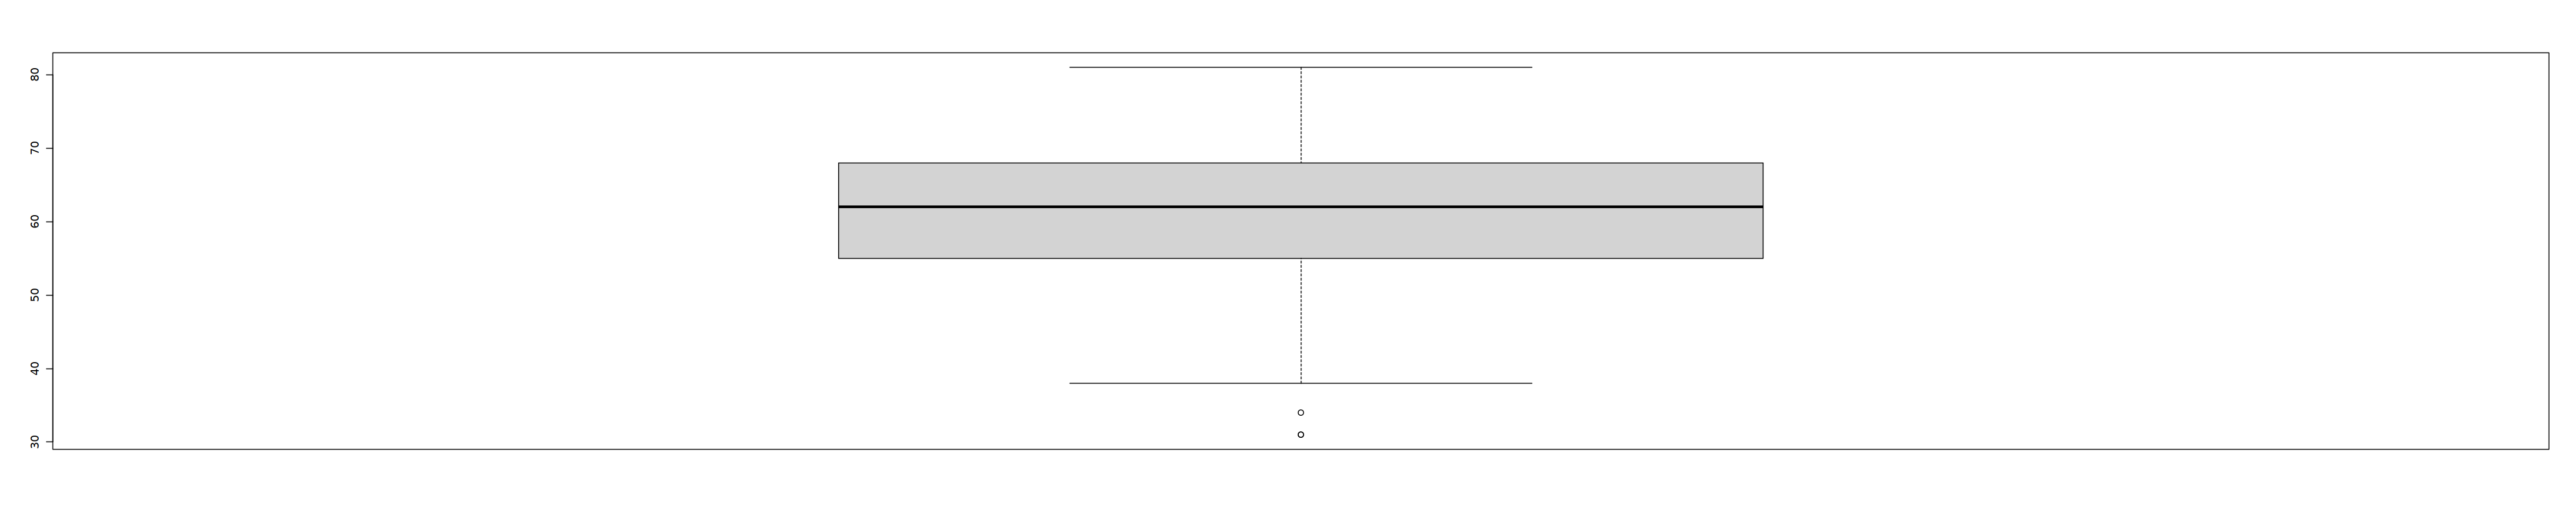

In [165]:
boxplot(unique(data_for_analysis[,c('m_x','age')])$age) 

In [166]:
unique(data_for_analysis[,c('m_x', 'sex')]) %>% group_by(sex) %>% count()  # 14 female, 47 male

sex n 
1 f   14
2 m   47

# Analyze cell type and cluster distributions

## Functions for analysis

In [167]:
### Calculate distribution

In [168]:
calculate_distribution = function(totalgroup, grouping, data_for_analysis){
    
    grouped =  data_for_analysis %>% group_by(.dots = c(grouping, totalgroup)) %>% count()
    
    total = data_for_analysis %>% group_by(.dots =grouping) %>% count()
    
    total$total_amount = total$n
    total = subset(total, select= -c(n))

    grouped$grouped_amount = grouped$n
    grouped = subset(grouped, select = -c(n))

    distribution = merge(total, grouped)

    distribution$percentage = round(distribution$grouped_amount / distribution$total_amount,2)
    
    return(distribution)
    }

In [169]:
### Function for visualization of distribution

In [170]:
calculate_and_plot_distribution = function(totalgroup, grouping, data_for_analysis, plot_width= 40, plot_height = 8, percentage = TRUE, text_size = 3, axis_text = 15, save = FALSE, save_name = 'None'){
    
    if( save == TRUE){
        pdf( paste('figures/B4/', save_name, '.pdf', sep = '') , width=plot_width, height=plot_height)
    }
    
    grouped =  data_for_analysis %>% group_by(.dots = c(grouping, totalgroup)) %>% count()
    total = data_for_analysis %>% group_by(.dots =grouping) %>% count()
    
    total$total_amount = total$n
    
    grouped$grouped_amount = grouped$n
    grouped = grouped[,-3]
    
    distribution = merge(total, grouped)
    
    distribution$percentage = round(distribution$grouped_amount / distribution$total_amount,2)
    
    all = data_for_analysis %>% group_by(.dots =totalgroup) %>% count()
    all$percentage = round( all$n / nrow(data_for_analysis),2)
    all$total_amount = nrow(data_for_analysis)
    all[grouping] = 'all'
    all['grouped_amount'] = all$n
    all = as.data.frame(all)
    
    options(repr.plot.width=plot_width, repr.plot.height=plot_height)
    
    if(percentage == TRUE){
        distribution = rbind(all, distribution)
        p = ggplot(distribution, aes(fill=as.character(distribution[,totalgroup]), y=percentage, x=as.character(distribution[,grouping]), label = percentage)) + geom_bar(position="stack", stat="identity")   + geom_text( size = text_size, position = position_stack(vjust = 0.5))  + ylab ('Percentage of cells')+ xlab(grouping) +  labs(fill = totalgroup) +  scale_fill_hue(c=45, l=80) +  theme( axis.title=element_text(size=axis_text), axis.text =element_text(size=axis_text) )
    }
    else{
        p = ggplot(distribution, aes(fill=as.character(distribution[,totalgroup]), y=grouped_amount, x=as.character(distribution[,grouping]), label = grouped_amount)) + geom_bar(position="stack", stat="identity")   + geom_text( size = text_size, position = position_stack(vjust = 0.5))  + ylab ('Amount of cells')+ xlab(grouping) +  labs(fill = totalgroup) +  scale_fill_hue(c=45, l=80)+  theme( axis.title=element_text(size=axis_text), axis.text =element_text(size=axis_text))
        }
    print(p)
    
    if (save == TRUE){
        dev.off()
        }
    
    if (save == TRUE){
        distribution = distribution[,-2]
        write.csv(distribution, paste(result_path ,'/B-Analysis/',  save_name, '.csv' , sep = ''))
        }

    return(distribution)
    
    ## TBD: adapt to adjust text-sized:
    ##+ geom_text( size = 5, position = position_stack(vjust = 0.5))  + ylab ('Percentage of cells')+   scale_fill_hue(c=45, l=80)  + theme(axis.text=element_text(size=30),
    ##    axis.title=element_text(size=30))
}

In [171]:
### Function for visualization of confusion matrix

In [172]:
conf_matrix <- function(df.true, df.pred, title = "", true.lab ="True Class", pred.lab ="Predicted Class",
                        high.col = 'red', low.col = 'white') {
  #convert input vector to factors, and ensure they have the same levels
  df.true <- as.factor(df.true)
  df.pred <- factor(df.pred, levels = levels(df.true))
  
  #generate confusion matrix, and confusion matrix as a pecentage of each true class (to be used for color) 
  df.cm <- table(True = df.true, Pred = df.pred)
  df.cm.col <- df.cm / rowSums(df.cm)
  
  #convert confusion matrices to tables, and binding them together
  df.table <- reshape2::melt(df.cm)
  df.table.col <- reshape2::melt(df.cm.col)
  df.table <- left_join(df.table, df.table.col, by =c("True", "Pred"))
  
  #calculate accuracy and class accuracy
  acc.vector <- c(diag(df.cm)) / c(rowSums(df.cm))
  class.acc <- data.frame(Pred = "Class Acc.", True = names(acc.vector), value = acc.vector)
  acc <- sum(diag(df.cm)) / sum(df.cm)
  
  #plot
  ggplot() +
    geom_tile(aes(x=Pred, y=True, fill=value.y),
              data=df.table, size=0.2, color=grey(0.5)) +
    geom_tile(aes(x=Pred, y=True),
              data=df.table[df.table$True==df.table$Pred, ], size=1, color="black", fill = 'transparent') +
    scale_x_discrete(position = "top",  limits = c(levels(df.table$Pred), "Class Acc.")) +
    scale_y_discrete(limits = rev(unique(levels(df.table$Pred)))) +
    labs(x=pred.lab, y=true.lab, fill=NULL,
         title= paste0(title, "\nAccuracy ", round(100*acc, 1), "%")) +
    geom_text(aes(x=Pred, y=True, label=value.x),
              data=df.table, size=4, colour="black") +
    geom_text(data = class.acc, aes(Pred, True, label = paste0(round(100*value), "%"))) +
    scale_fill_gradient(low=low.col, high=high.col, labels = scales::percent,
                        limits = c(0,1), breaks = c(0,0.5,1)) +
    guides(size=F) +
    theme_bw() +
    theme(panel.border = element_blank(), legend.position = "bottom",
          axis.text = element_text(color='black'), axis.ticks = element_blank(),
          panel.grid = element_blank(), axis.text.x.top = element_text(angle = 30, vjust = 0, hjust = 0)) +
    coord_fixed()

}

## Calculate distributions and add CLR transformation

In [173]:
colnames(data_for_analysis)

[1] "cell_type"                                           
 [2] "X"                                                   
 [3] "nCount_HTO"                                          
 [4] "nFeature_HTO"                                        
 [5] "nCount_RNA"                                          
 [6] "nFeature_RNA"                                        
 [7] "percent_mt"                                          
 [8] "HTO_maxID"                                           
 [9] "HTO_secondID"                                        
[10] "HTO_margin"                                          
[11] "HTO_classification"                                  
[12] "HTO_classification.global"                           
[13] "hash.ID"                                             
[14] "HTO_classification_final"                            
[15] "name"                                                
[16] "library"                                             
[17] "id"                                                  
[18] "read"                                                
[19] "pattern"                                             
[20] "sequence"                                            
[21] "feature_type"                                        
[22] "Unnamed..7"                                          
[23] "in_sample"                                           
[24] "display_name"                                        
[25] "group_x"                                             
[26] "HTO_Doublet_Classification"                          
[27] "doublet_score"                                       
[28] "predicted_doublet"                                   
[29] "A5_scrublet_predicted_doublet_lib0.1"                
[30] "A5_scrublet_doublet_score_lib_0.1"                   
[31] "A5_scrublet_predicted_doublet_lib0.2"                
[32] "A5_scrublet_doublet_score_lib_0.2"                   
[33] "A5_scrublet_predicted_doublet_lib"                   
[34] "A5_scrublet_doublet_score_lib"                       
[35] "n_genes"                                             
[36] "n_genes_by_counts"                                   
[37] "total_counts"                                        
[38] "total_counts_mt"                                     
[39] "pct_counts_mt"                                       
[40] "valid_cell_filter_dying"                             
[41] "valid_cell_filter_doublet"                           
[42] "A7_PCA_50_10_neighbors_cluster"                      
[43] "A7_PCA_100_10_neighbors_cluster"                     
[44] "A7_PCA_100_50_neighbors_cluster"                     
[45] "A7_PCA_500_50_neighbors_cluster"                     
[46] "A7_Singlet_PCA_50_10_neighbors_cluster"              
[47] "A7_Singlet_PCA_100_10_neighbors_cluster"             
[48] "A7_Singlet_RB_MT_PCA_50_10_neighbors_cluster"        
[49] "A7_Singlet_RB_MT_PCA_100_10_neighbors_cluster"       
[50] "library_id"                                          
[51] "B2_Concat_Singlet_PCA_50_10_neighbors_cluster"       
[52] "B2_Concat_Singlet_PCA_100_10_neighbors_cluster"      
[53] "B2_Concat_Singlet_RB_MT_PCA_50_10_neighbors_cluster" 
[54] "B2_Concat_Singlet_RB_MT_PCA_100_10_neighbors_cluster"
[55] "leiden"                                              
[56] "cluster_cell_type"                                   
[57] "library.hashtag_x"                                   
[58] "age"                                                 
[59] "sex"                                                 
[60] "m_x"                                                 
[61] "classification"                                      
[62] "group_y"                                             
[63] "measurement_x"                                       
[64] "sample_x"                                            
[65] "Unnamed..0"                                          
[66] "library.hashtag_y"                                   
[67] "m_y"                               

In [174]:
sample_distribution = calculate_distribution (totalgroup = 'B2_Scanorama_Singlet_rb_mt_cluster', grouping= c('display_name', 'classification'), data_for_analysis = data_for_analysis)

In [175]:
head(sample_distribution,2)

display_name classification total_amount B2_Scanorama_Singlet_rb_mt_cluster
1 1.1          acs_subacute   2126         0                                 
2 1.1          acs_subacute   2126         1                                 
  grouped_amount percentage
1 398            0.19      
2 156            0.07

In [176]:
for ( i in unique(sample_distribution$display_name)){
    clr_data = sample_distribution[sample_distribution$display_name == i,]
    percentage_clr = clr(clr_data$percentage)
    
    sample_distribution[sample_distribution$display_name == i,'percentage_clr'] = percentage_clr
    }

In [177]:
head(sample_distribution[sample_distribution$display_name == '1.1',], 2)

display_name classification total_amount B2_Scanorama_Singlet_rb_mt_cluster
1 1.1          acs_subacute   2126         0                                 
2 1.1          acs_subacute   2126         1                                 
  grouped_amount percentage percentage_clr
1 398            0.19       1.4807037     
2 156            0.07       0.4821749

In [178]:
save_name = 'B4_Distribution_Cluster_Sample_cell_type_Scanorama_clr'

In [179]:
write.csv(sample_distribution, paste(result_path ,'/B-Analysis/',  save_name, '.csv' , sep = ''))

## Visualize different distributions per cluster (sample 6.4 + 13.2)

In [180]:
### Sample 13.2

In [181]:
data_for_analysis_subset = data_for_analysis[data_for_analysis$HTO_classification_final %in% c( '13.2'),]

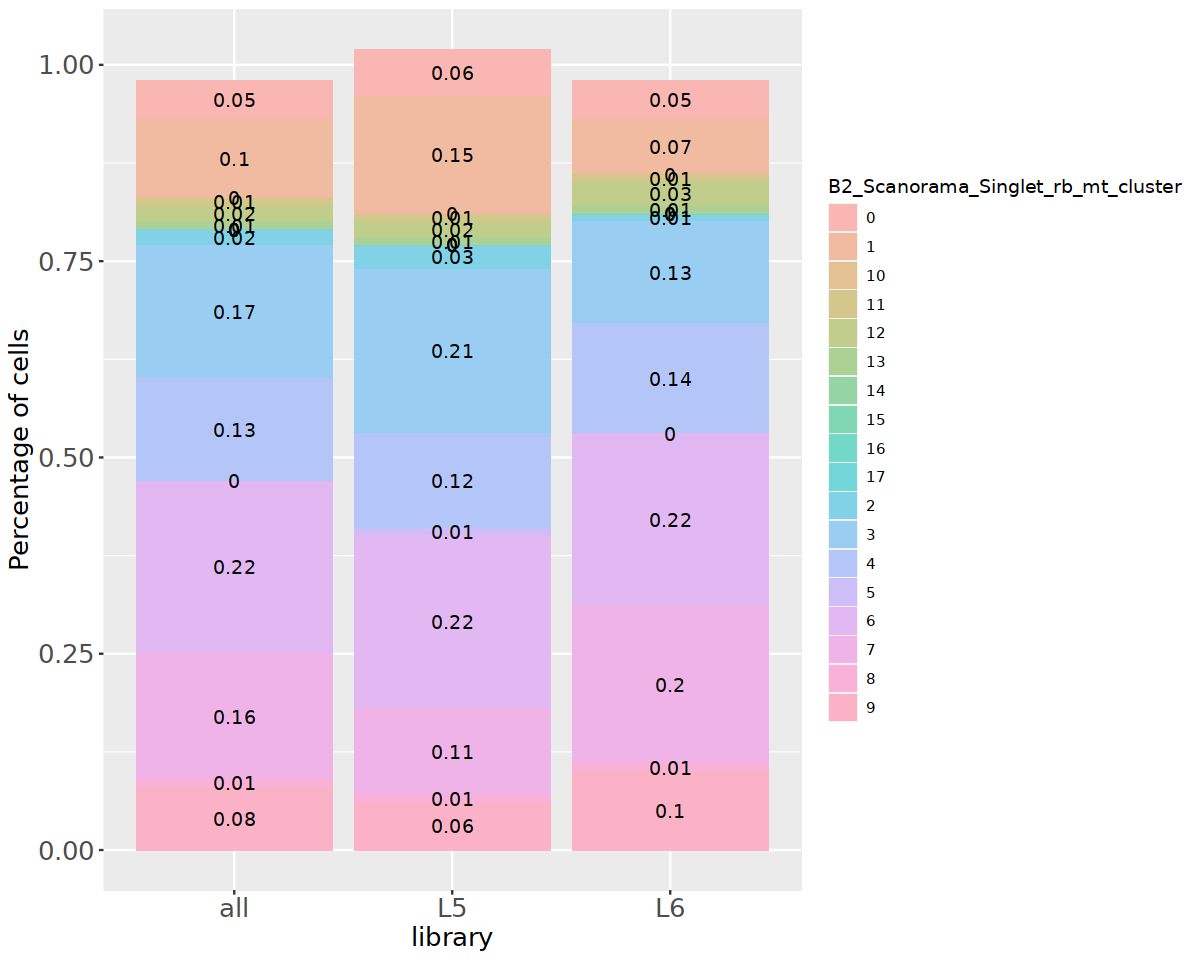

In [182]:
dis = calculate_and_plot_distribution(totalgroup =used_clustering, grouping = 'library', data_for_analysis_subset, plot_width= 10, plot_height = 8,  text_size = 4, axis_text = 15)

In [183]:
head(dis)

B2_Scanorama_Singlet_rb_mt_cluster n   percentage total_amount library
1 0                                  140 0.05       2668         all    
2 1                                  280 0.10       2668         all    
3 2                                   49 0.02       2668         all    
4 3                                  446 0.17       2668         all    
5 4                                  352 0.13       2668         all    
6 5                                   11 0.00       2668         all    
  grouped_amount
1 140           
2 280           
3  49           
4 446           
5 352           
6  11

In [184]:
### Sample 6.4 

In [185]:
data_for_analysis_subset = data_for_analysis[data_for_analysis$HTO_classification_final %in% c( '6.4'),]

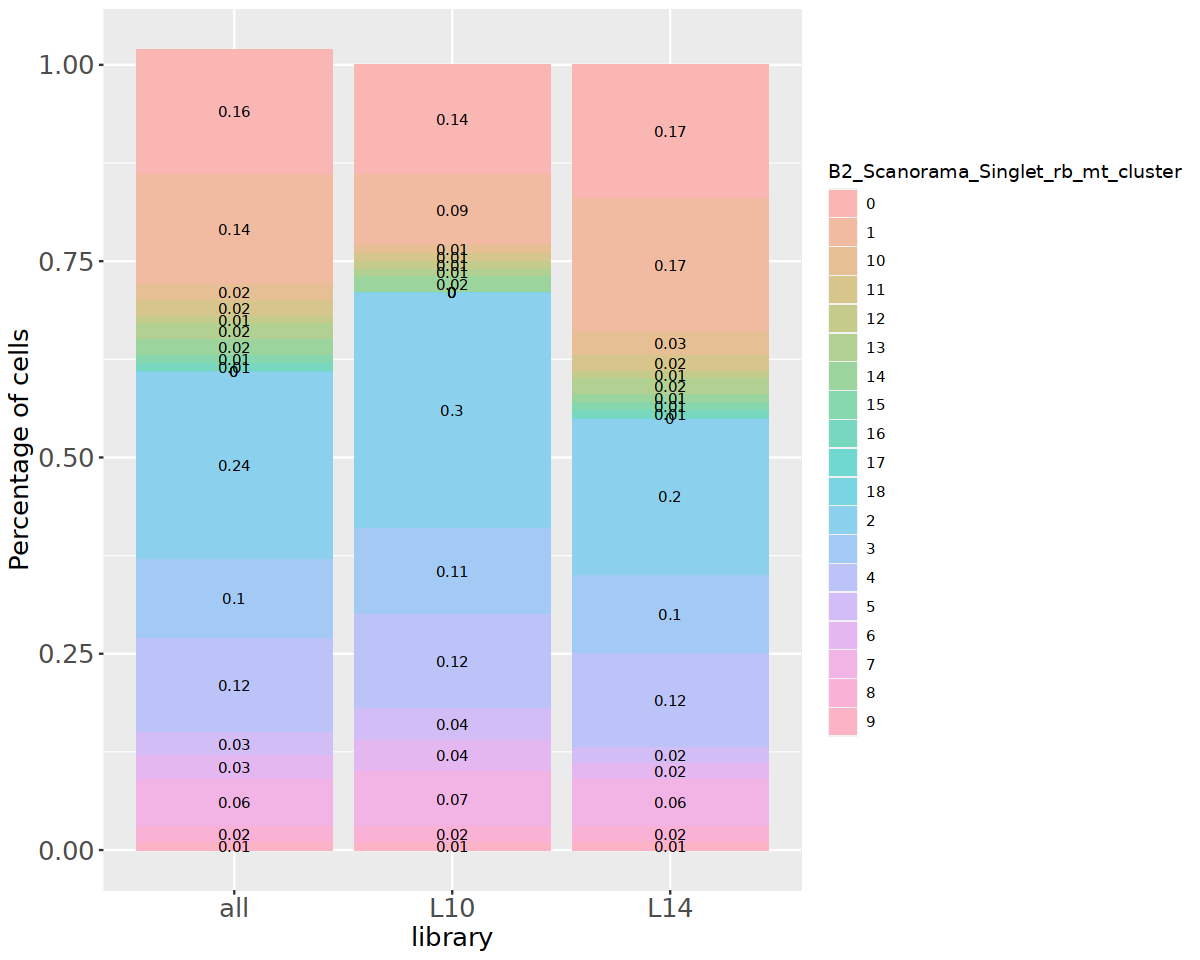

In [186]:
dis = calculate_and_plot_distribution(totalgroup =used_clustering, grouping = 'library', data_for_analysis_subset,  plot_width= 10, plot_height = 8)

## Visualize different distributions per annotation (sample 6.4 + 13.2)

In [187]:
### Sample: 13.2

In [188]:
data_for_analysis_subset = data_for_analysis[data_for_analysis$HTO_classification_final %in% c('13.2'),]

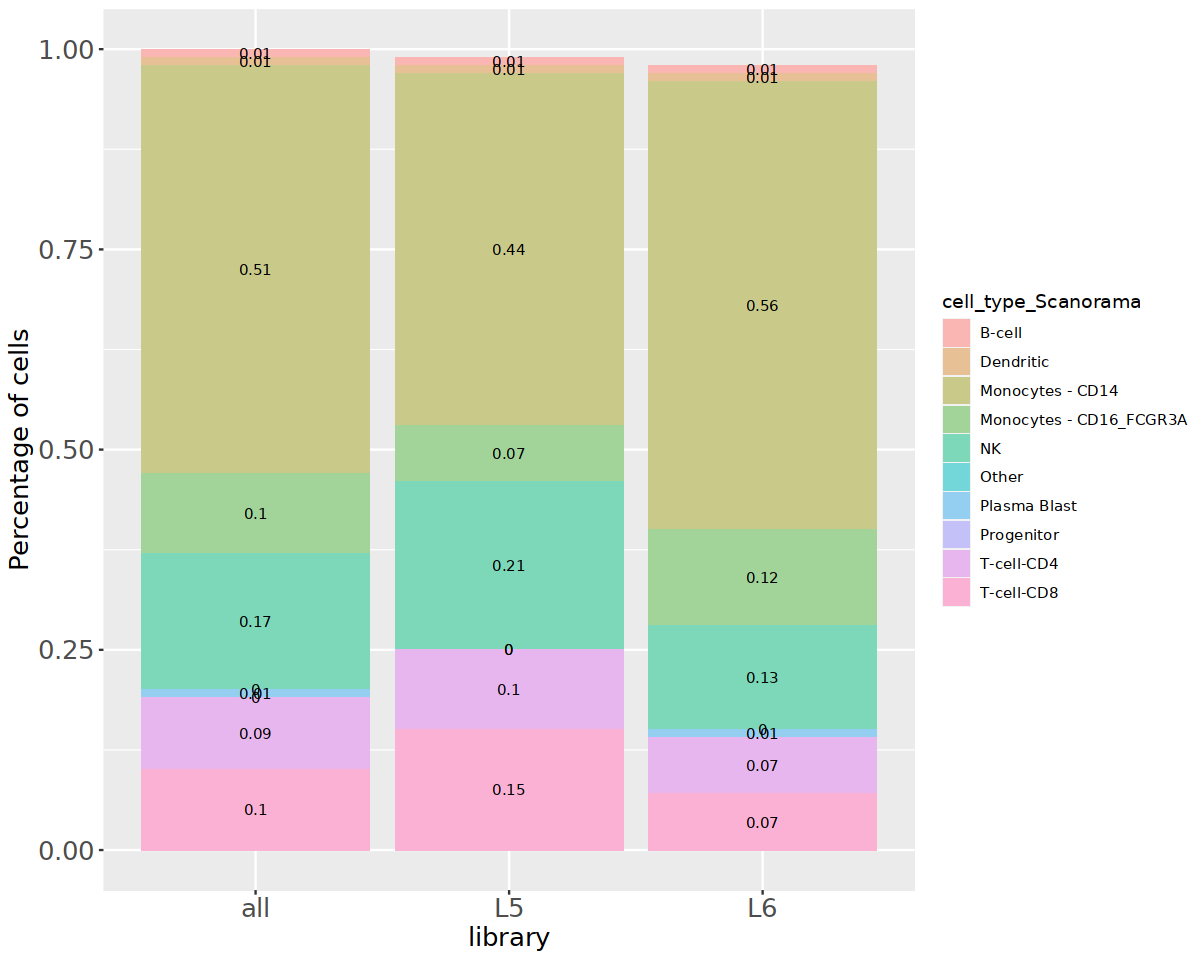

In [189]:
 dis = calculate_and_plot_distribution(totalgroup =used_annotation, grouping = 'library', data_for_analysis_subset,  plot_width= 10, plot_height = 8)

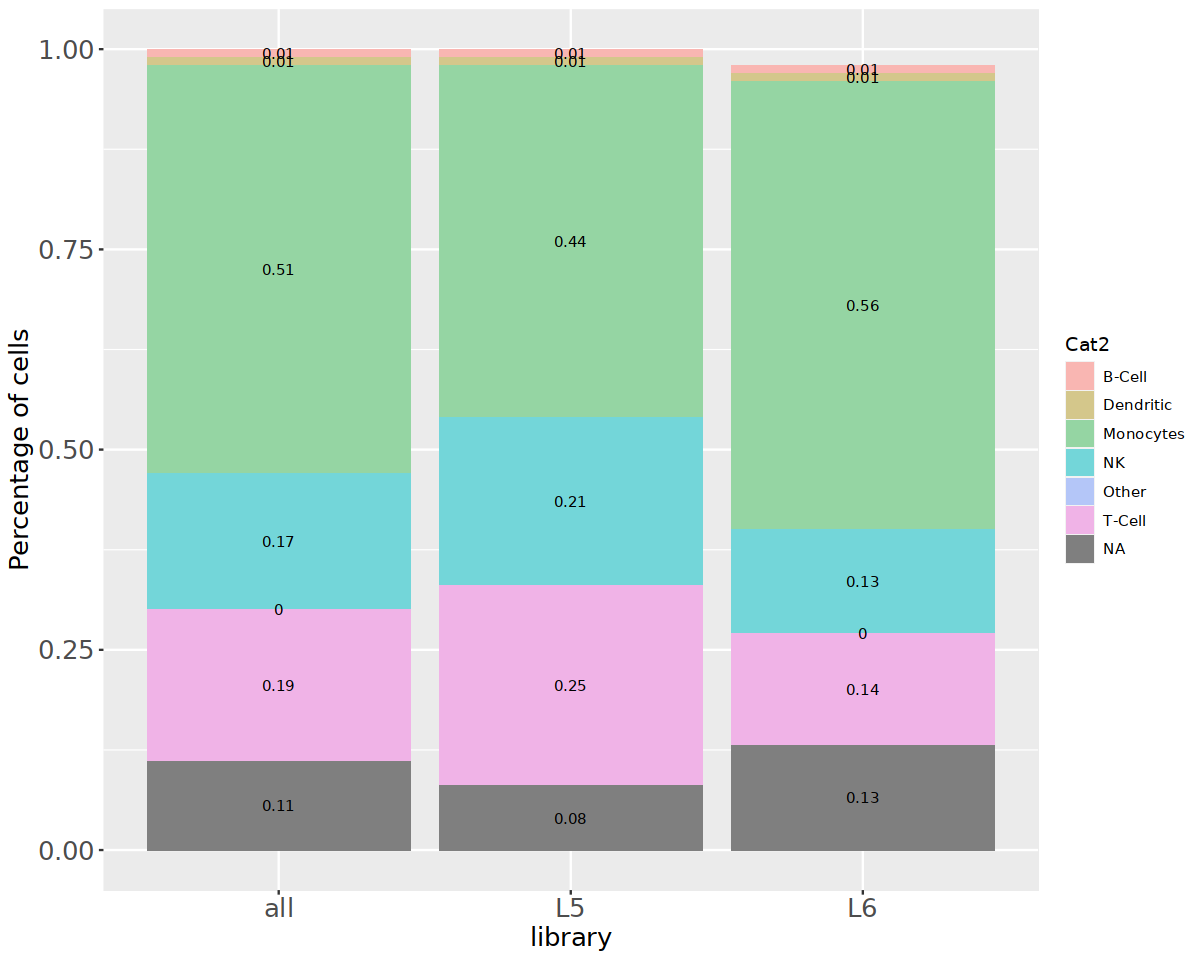

In [190]:
dis = calculate_and_plot_distribution(totalgroup ='Cat2', grouping = 'library', data_for_analysis_subset,  plot_width= 10, plot_height = 8)

In [191]:
### Sample: 6.4

In [192]:
data_for_analysis_subset = data_for_analysis[data_for_analysis$HTO_classification_final %in% c('6.4'),]

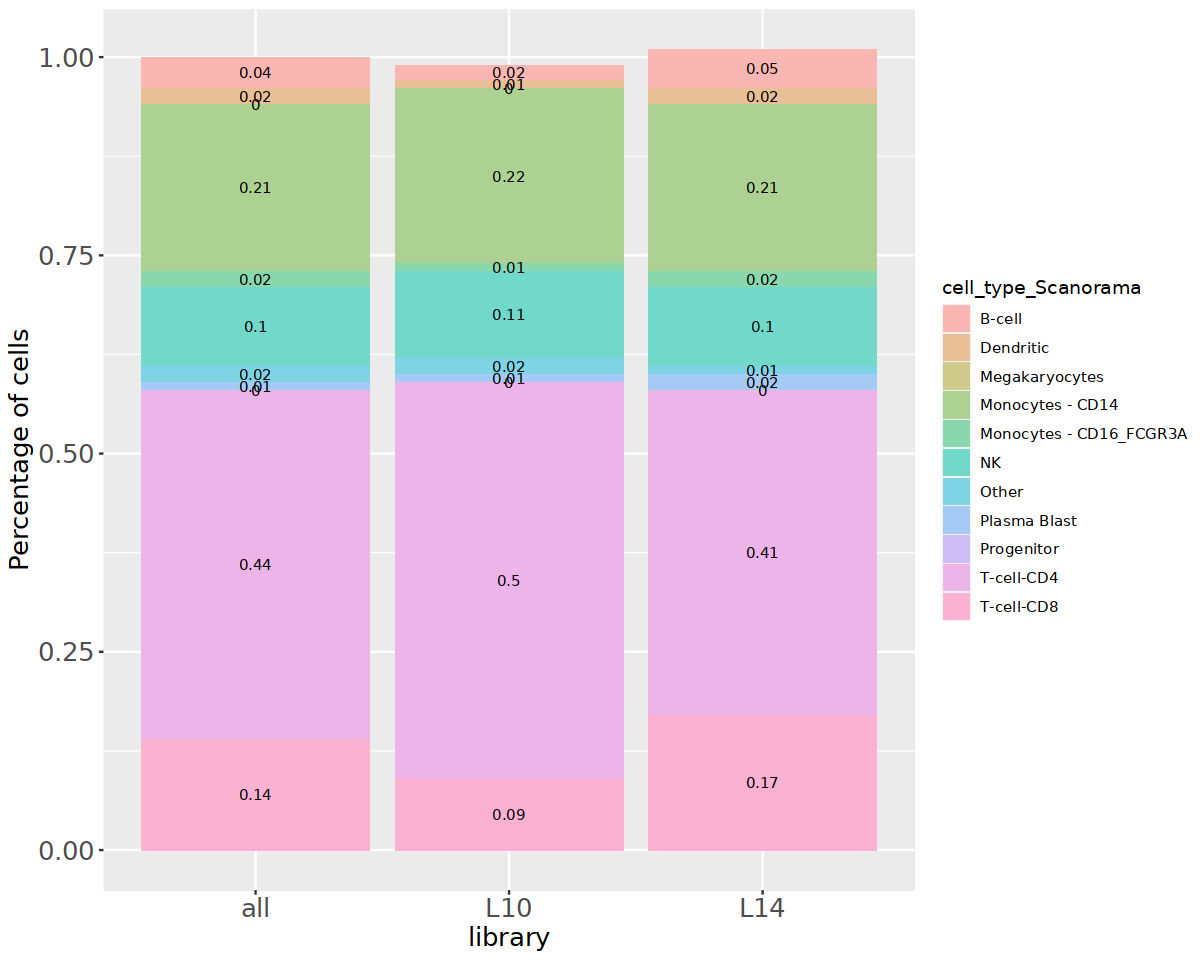

In [193]:
dis = calculate_and_plot_distribution(totalgroup =used_annotation, grouping = 'library', data_for_analysis_subset,  plot_width= 10, plot_height = 8)

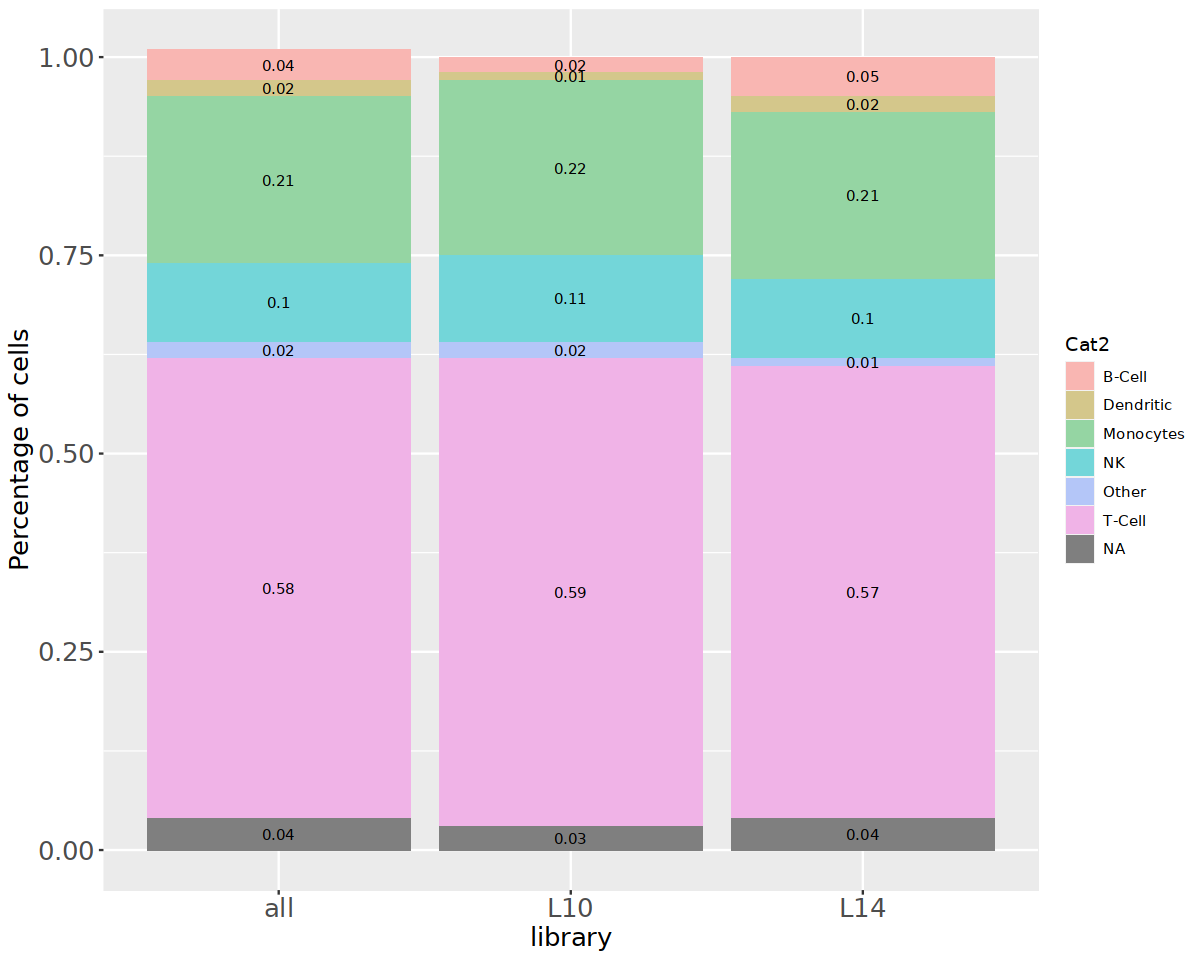

In [194]:
dis = calculate_and_plot_distribution(totalgroup ='Cat2', grouping = 'library', data_for_analysis_subset,  plot_width= 10, plot_height = 8)

## Visualize distribution of clusters for all samples

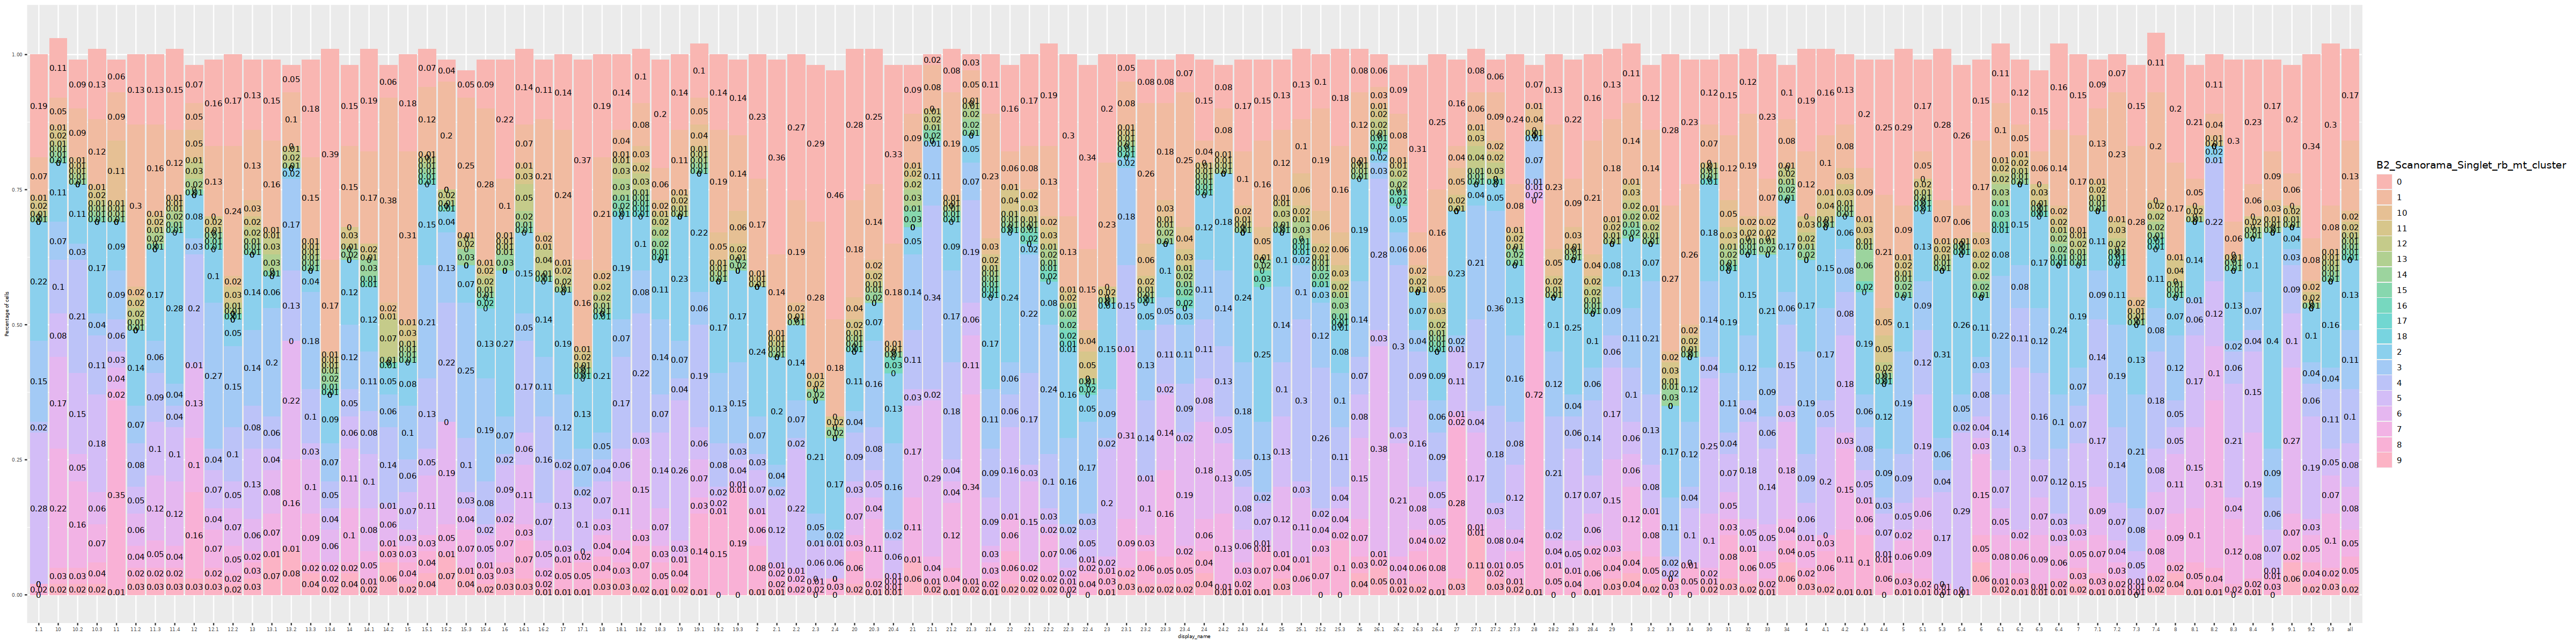

In [195]:
dis = calculate_and_plot_distribution(totalgroup =used_clustering, grouping = 'display_name', data_for_analysis,  plot_width= 40, plot_height = 10, axis_text = 5)

In [196]:
dis = calculate_and_plot_distribution(totalgroup =used_clustering, grouping = 'display_name', data_for_analysis,  plot_width= 40, plot_height = 10, axis_text = 5, save = TRUE, save_name = paste('B4_Distribution_Cluster_Sample_', used_annotation, sep = ''))

## Visualize distribution of cell types for all samples

In [197]:
data_for_analysis$display_name = as.character(data_for_analysis$display_name)

In [198]:
### Annotation level

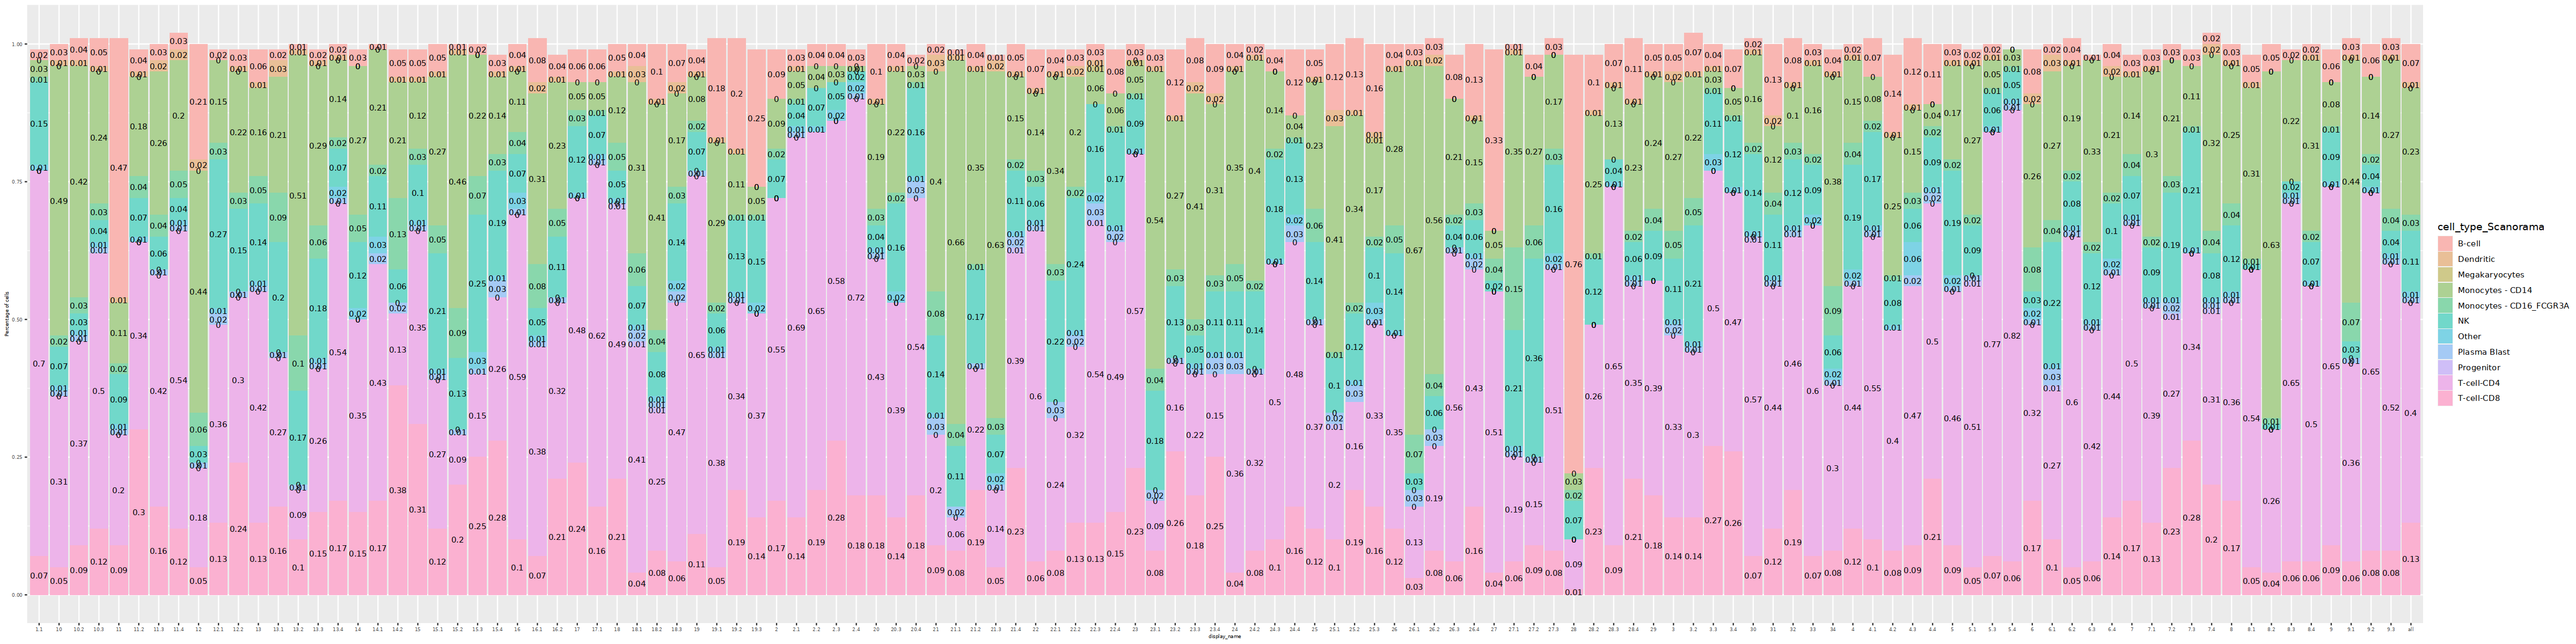

In [199]:
dis = calculate_and_plot_distribution(totalgroup =used_annotation, grouping = 'display_name', data_for_analysis,  plot_width= 40, plot_height = 10, axis_text = 5)

In [200]:
dis = calculate_and_plot_distribution(totalgroup =used_annotation, grouping = 'display_name', data_for_analysis,  plot_width= 40, plot_height = 10, axis_text = 5, save = TRUE, save_name = paste('B4_Distribution_Annotation_Sample_', used_annotation, sep = ''))

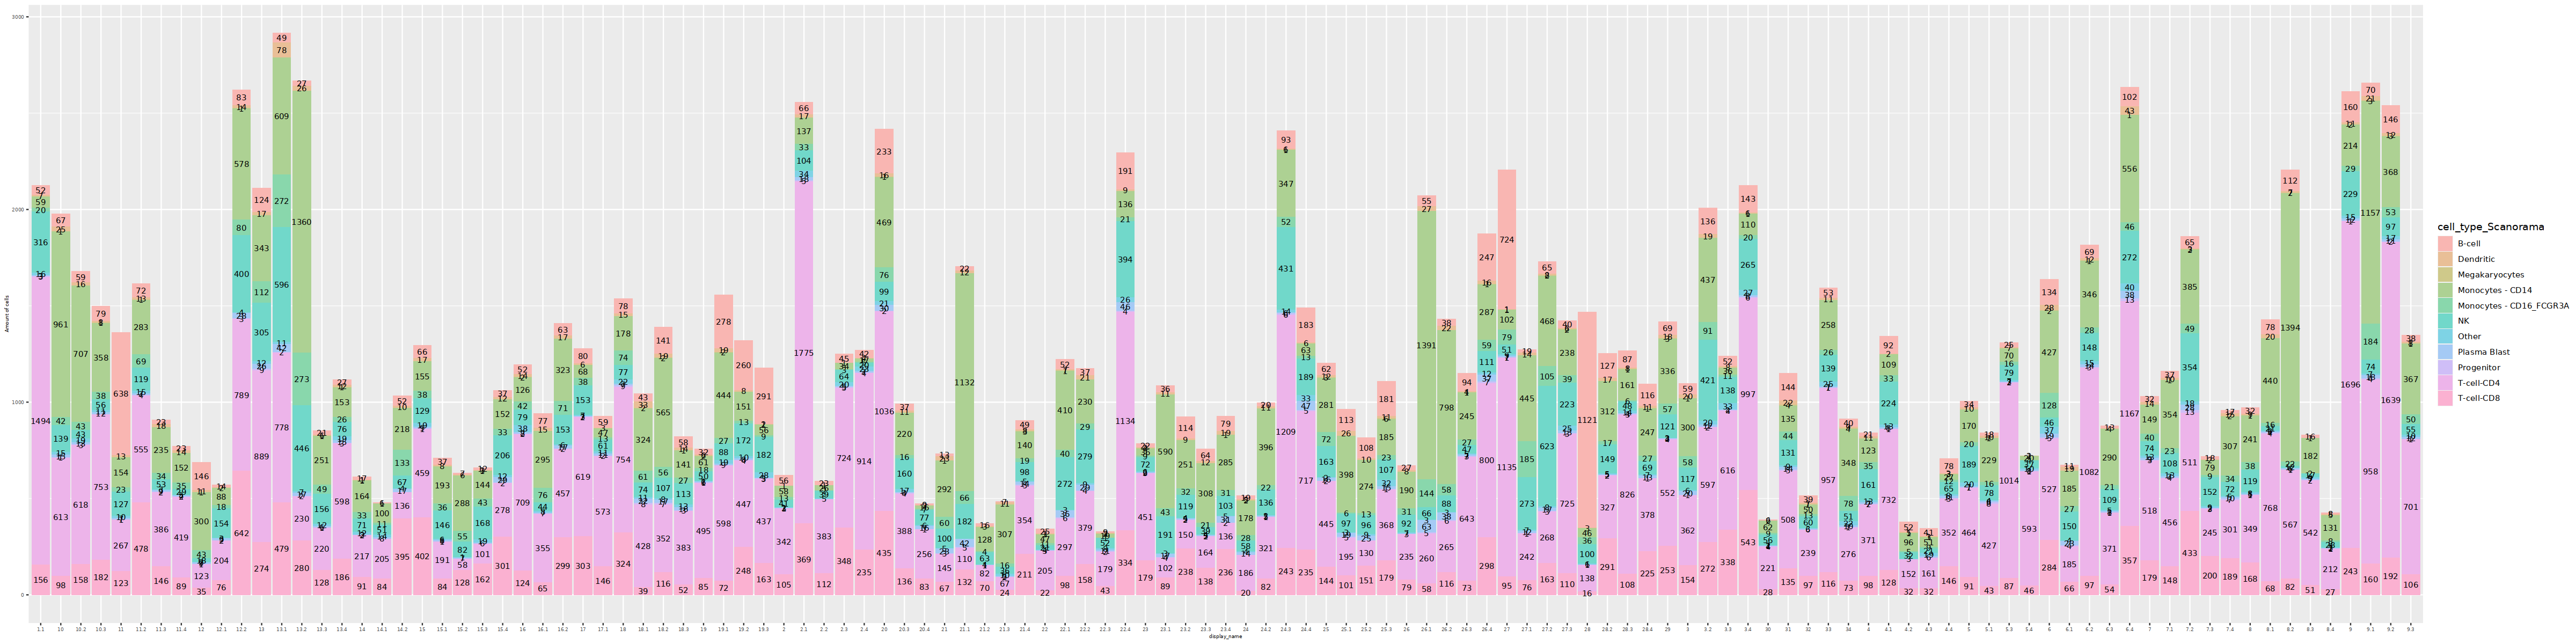

In [201]:
dis = calculate_and_plot_distribution(totalgroup =used_annotation, grouping = 'display_name', data_for_analysis,  plot_width= 40, plot_height = 10, percentage = FALSE, axis_text = 5)

In [202]:
dis = calculate_and_plot_distribution(totalgroup =used_annotation, grouping = 'display_name', data_for_analysis,  plot_width= 40, plot_height = 10, percentage = FALSE, axis_text = 5, save = TRUE, save_name = paste('B4_Distribution_Annotation_Sample_', used_annotation, '_absolute', sep = ''))

In [203]:
### Meta Annotation Level

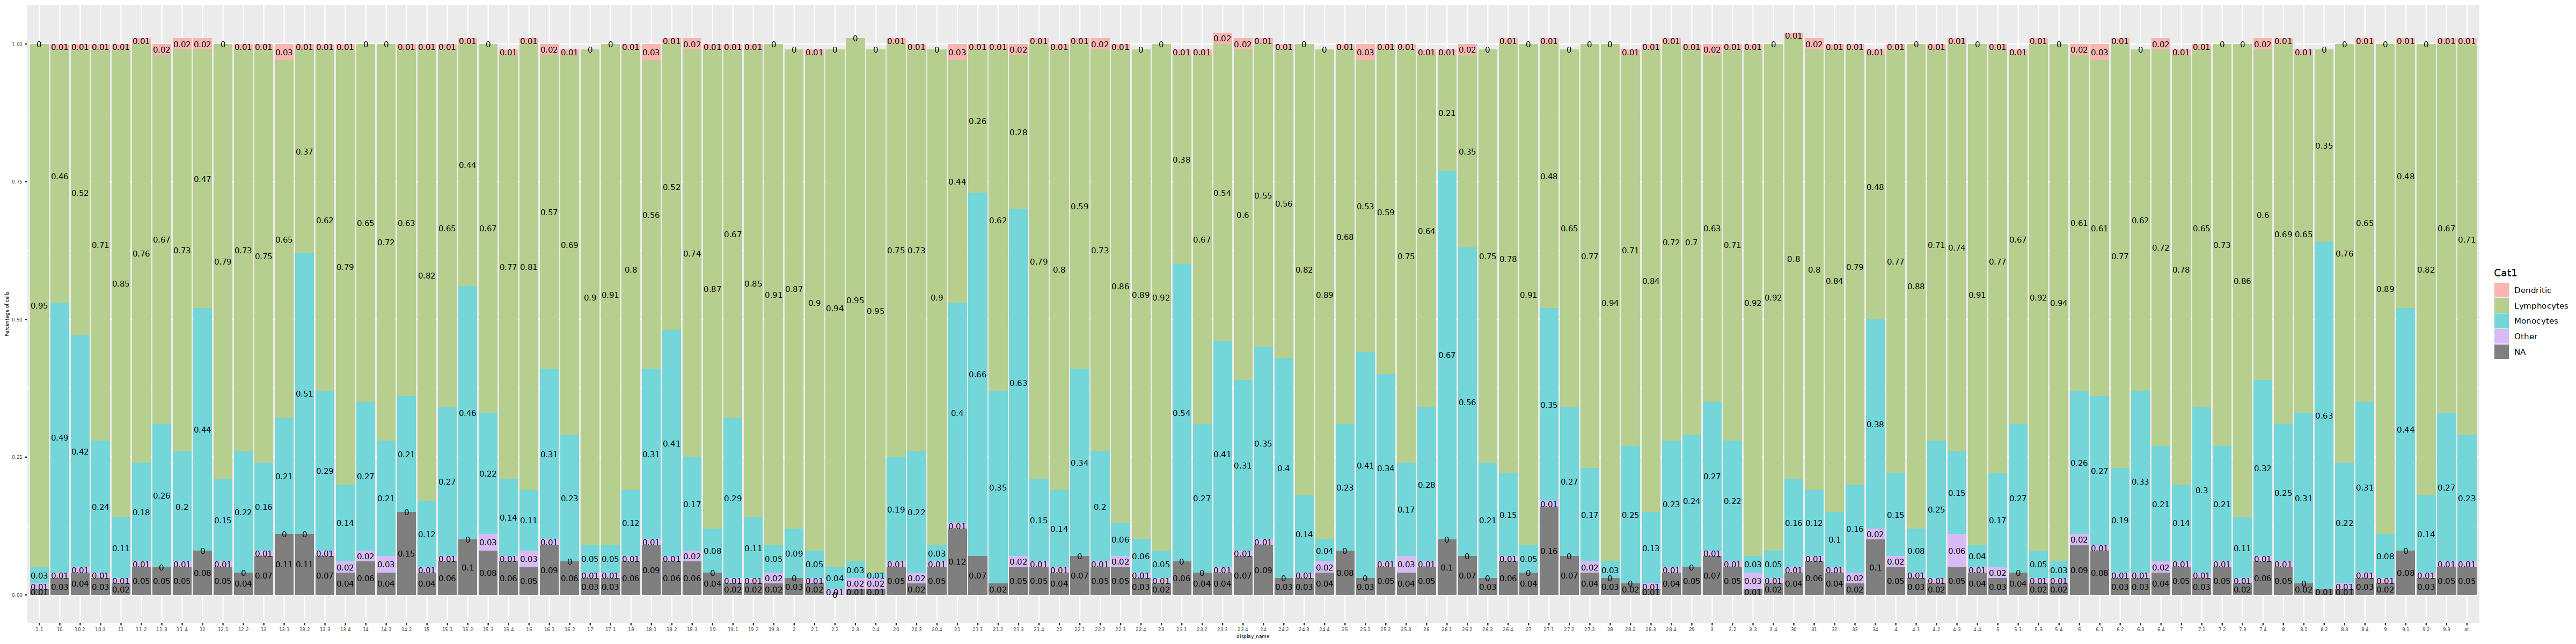

In [204]:
dis = calculate_and_plot_distribution(totalgroup ='Cat1', grouping = 'display_name', data_for_analysis,  plot_width= 40, plot_height = 10,  axis_text = 5)

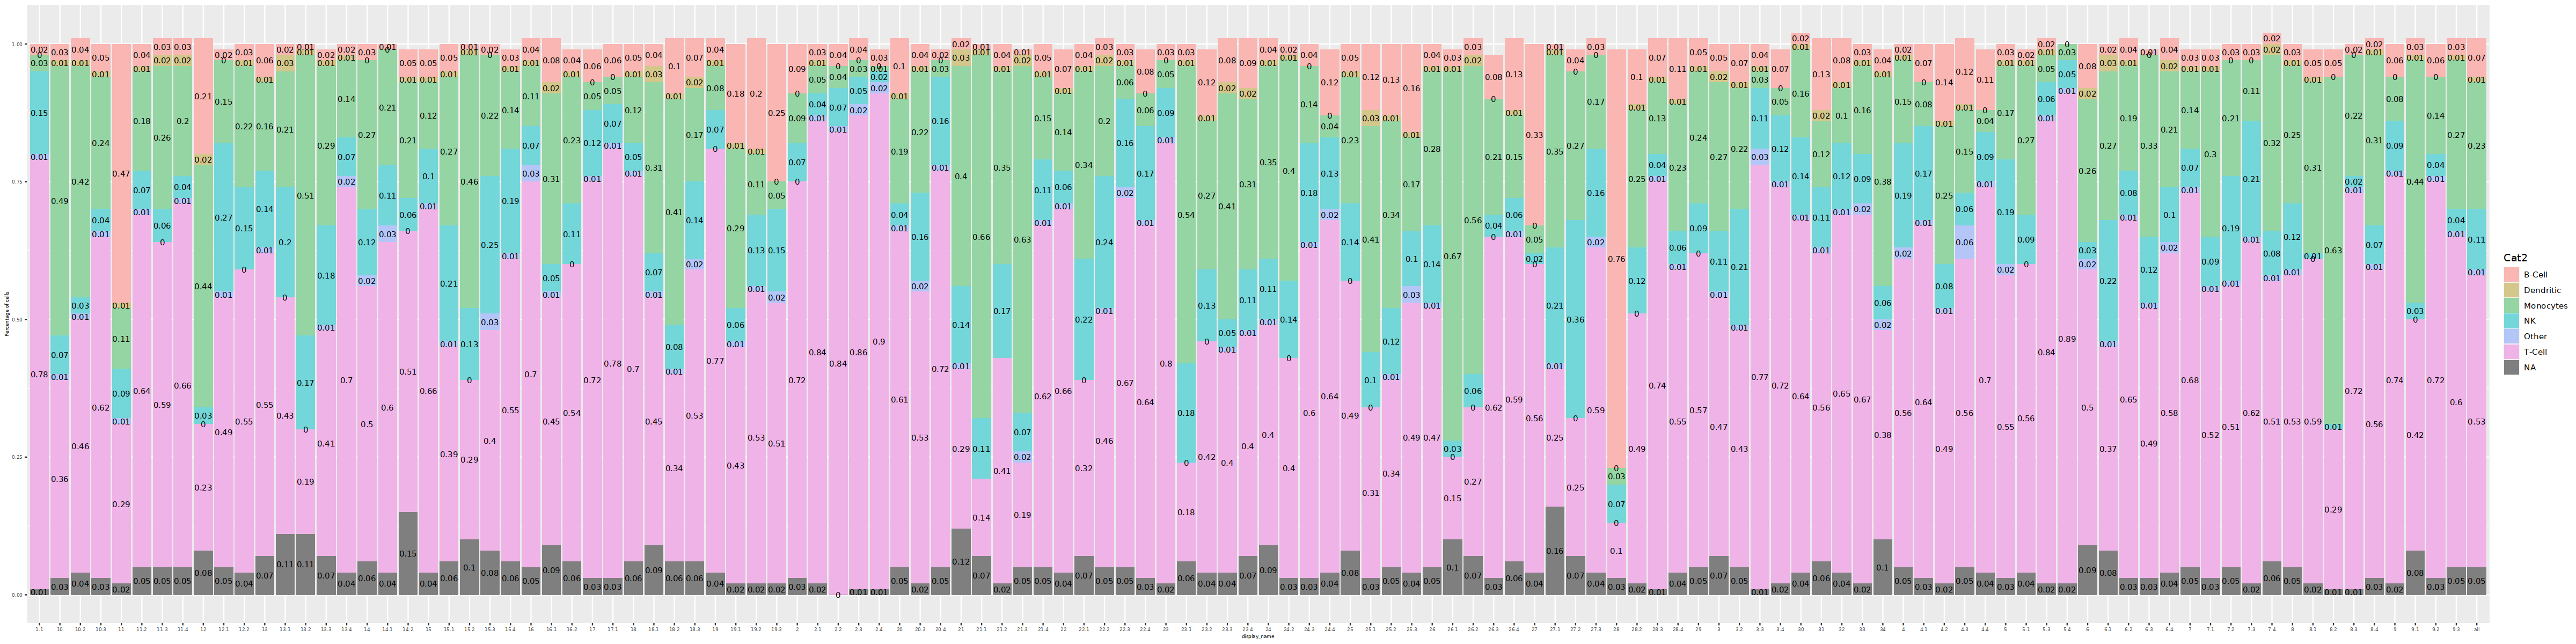

In [205]:
dis = calculate_and_plot_distribution(totalgroup ='Cat2', grouping = 'display_name', data_for_analysis,  plot_width= 40, plot_height = 10,  axis_text = 5)

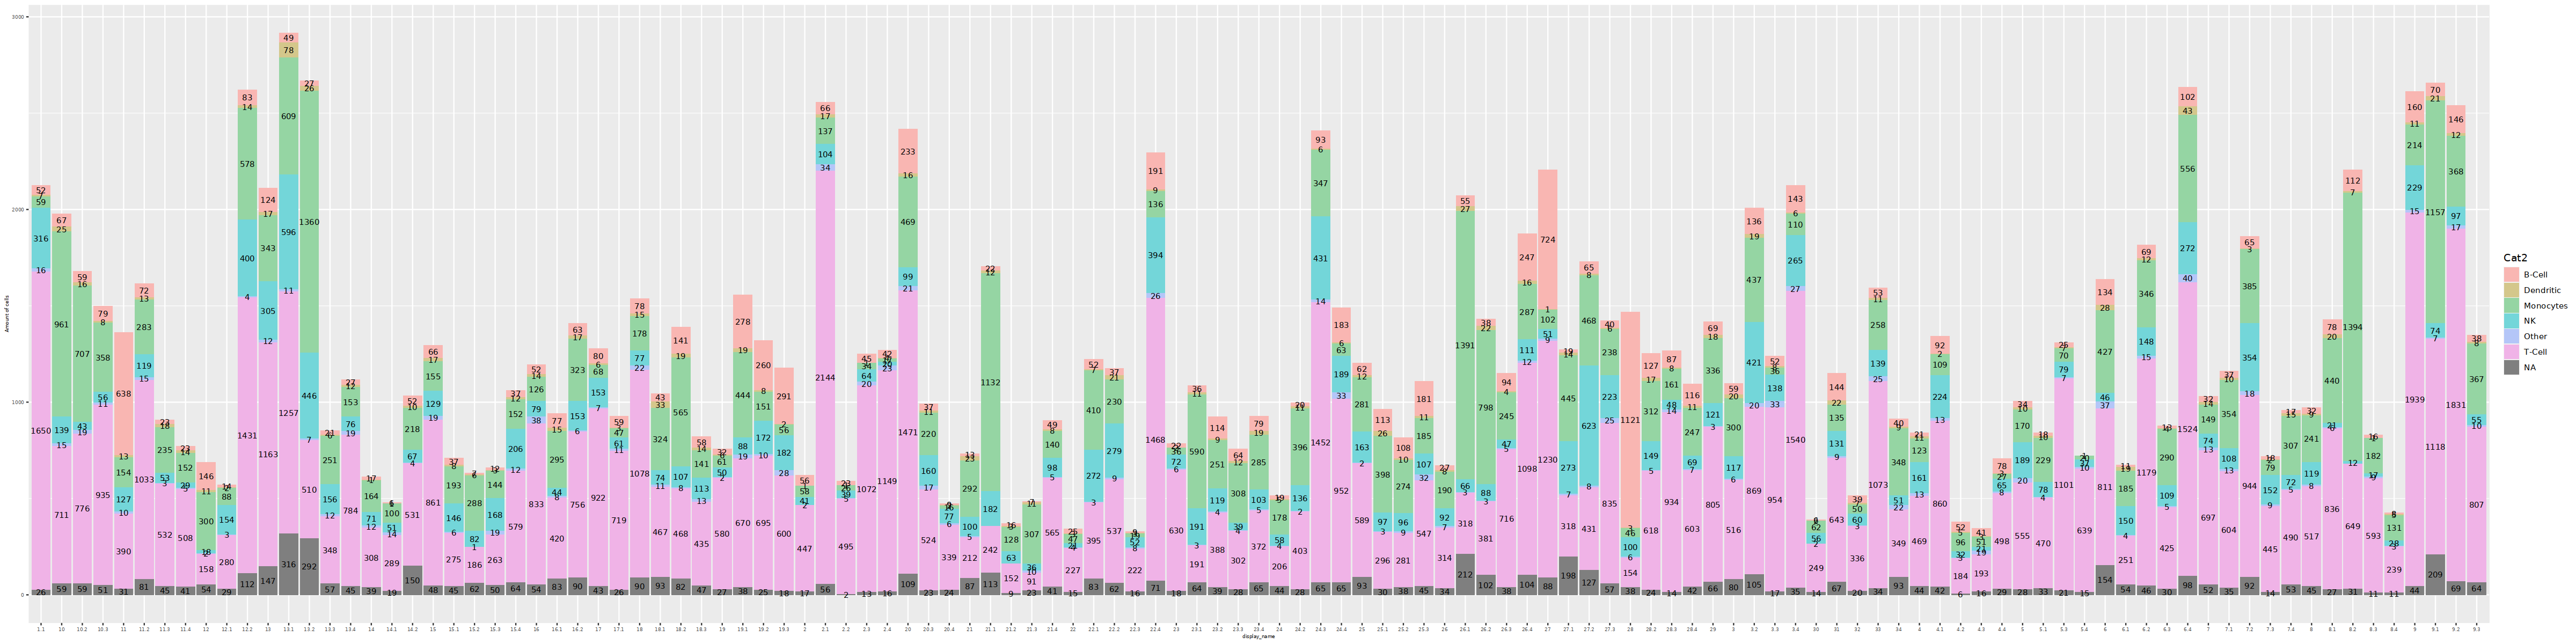

In [206]:
dis = calculate_and_plot_distribution(totalgroup ='Cat2', grouping = 'display_name', data_for_analysis,  plot_width= 40, plot_height = 10, percentage = FALSE,  axis_text = 5)

In [207]:
head(dis)

display_name n    total_amount Cat2      grouped_amount percentage
1 1.1          2126 2126         B-Cell      52           0.02      
2 1.1          2126 2126         Dendritic    7           0.00      
3 1.1          2126 2126         Monocytes   59           0.03      
4 1.1          2126 2126         NK         316           0.15      
5 1.1          2126 2126         Other       16           0.01      
6 1.1          2126 2126         T-Cell    1650           0.78

In [208]:
dis %>% group_by(Cat2)%>% summarize(Mean = mean(percentage, na.rm=TRUE))

ERROR: Error in summarize(., Mean = mean(percentage, na.rm = TRUE)): argument "by" is missing, with no default


## Visualize distribution of cell types per library

In [ ]:
dis = calculate_and_plot_distribution(totalgroup =used_annotation, grouping = 'library', data_for_analysis,  plot_width= 40, plot_height = 10)

In [ ]:
dis = calculate_and_plot_distribution(totalgroup =used_annotation, grouping = 'library', data_for_analysis,  plot_width= 40, plot_height = 10, percentage = FALSE)

## Visualize distribution of cell types per group

In [ ]:
dis = calculate_and_plot_distribution(totalgroup =used_annotation, grouping = 'group_x', data_for_analysis,  plot_width= 40, plot_height = 10)

In [ ]:
dis = calculate_and_plot_distribution(totalgroup =used_annotation, grouping = 'group_x', data_for_analysis,  plot_width= 40, plot_height = 10, percentage = FALSE)

## Visualize Cluster Distributions per symptoms (DE comparisons)

### For Scanorama clusters - clusters as x vs classification as y

In [ ]:
### Percentages

In [ ]:
dis = calculate_and_plot_distribution( totalgroup = 'classification', grouping = 'B2_Scanorama_Singlet_rb_mt_cluster', data_for_analysis =  data_for_analysis_list[[variant]])

In [ ]:
### Absolute values

In [ ]:
dis = calculate_and_plot_distribution( totalgroup = 'classification', grouping = 'B2_Scanorama_Singlet_rb_mt_cluster', data_for_analysis =  data_for_analysis_list[[variant]], percentage = FALSE)

In [ ]:
### Save the plots 

In [ ]:
#dis = calculate_and_plot_distribution( totalgroup = 'classification', grouping = 'B2_Scanorama_Singlet_rb_mt_cluster', data_for_analysis =  data_for_analysis_list[[variant]],plot_width= 30, plot_height = 8, save = TRUE, percentage = FALSE, save_name = 'B4_Symptom_Distribution_classification_B2_Scanorama_Singlet_rb_mt_cluster_absolute')

In [209]:
#dis = calculate_and_plot_distribution( totalgroup = 'group_y', grouping = 'B2_Scanorama_Singlet_rb_mt_cluster', data_for_analysis =  data_for_analysis_list[[variant]],plot_width= 30, plot_height = 8, save = TRUE, percentage = FALSE, save_name = 'B4_Symptom_Distribution_group_B2_Scanorama_Singlet_rb_mt_cluster_absolute')

In [210]:
#dis = calculate_and_plot_distribution( totalgroup = 'delta_ef_value_group', grouping = 'B2_Scanorama_Singlet_rb_mt_cluster', data_for_analysis =  data_for_analysis_list[[variant]],plot_width= 30, plot_height = 8, save = TRUE, percentage = FALSE, save_name = 'B4_Symptom_Distribution_delta_ef_value_group_B2_Scanorama_Singlet_rb_mt_cluster_absolute')

In [211]:
# dis = calculate_and_plot_distribution( totalgroup = 'delta_ef_value_group_measurement', grouping = 'B2_Scanorama_Singlet_rb_mt_cluster', data_for_analysis =  data_for_analysis_list[[variant]],plot_width= 30, plot_height = 8, save = TRUE, percentage = FALSE, save_name = 'B4_Symptom_Distribution_delta_ef_value_group_measurement_B2_Scanorama_Singlet_rb_mt_cluster_absolute')
## TBD

In [212]:
#dis = calculate_and_plot_distribution( totalgroup = 'classification', grouping = 'B2_Scanorama_Singlet_rb_mt_cluster', data_for_analysis =  data_for_analysis_list[[variant]],plot_width= 30, plot_height = 8, save = TRUE, save_name = 'B4_Symptom_Distribution_classification_B2_Scanorama_Singlet_rb_mt_cluster')

In [213]:
#dis = calculate_and_plot_distribution( totalgroup = 'group_y', grouping = 'B2_Scanorama_Singlet_rb_mt_cluster', data_for_analysis =  data_for_analysis_list[[variant]],plot_width= 30, plot_height = 8, save = TRUE, save_name = 'B4_Symptom_Distribution_group_B2_Scanorama_Singlet_rb_mt_cluster')

In [214]:
#dis = calculate_and_plot_distribution( totalgroup = 'delta_ef_value_group', grouping = 'B2_Scanorama_Singlet_rb_mt_cluster', data_for_analysis =  data_for_analysis_list[[variant]],plot_width= 30, plot_height = 8, save = TRUE, save_name = 'B4_Symptom_Distribution_delta_ef_value_group_B2_Scanorama_Singlet_rb_mt_cluster')

### For Scanorama clusters - clusters as x vs classification_measurement as y

In [215]:
### Percentages

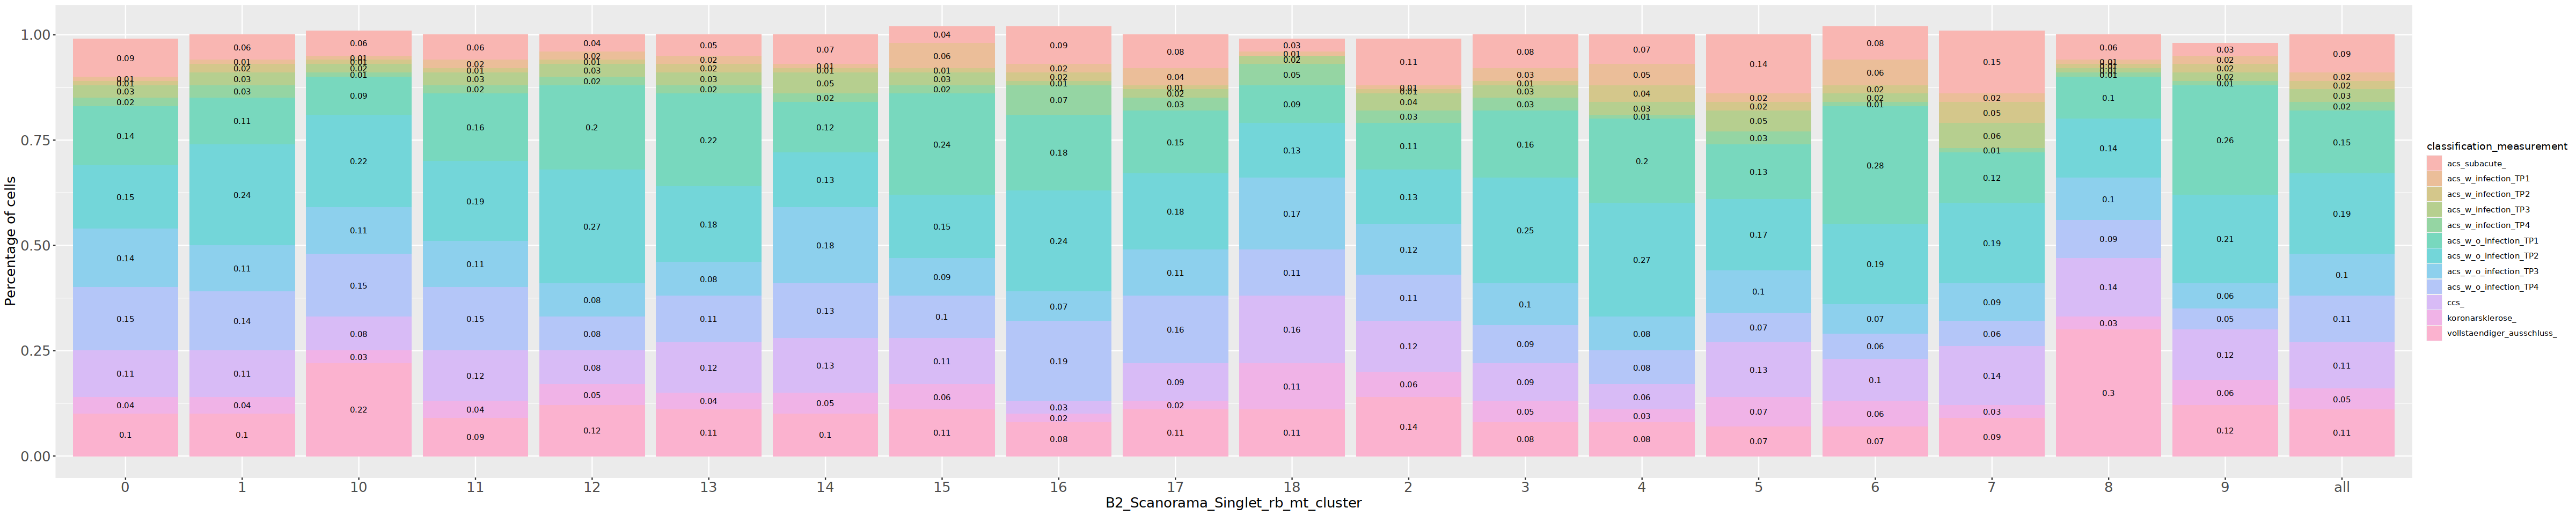

In [216]:
dis = calculate_and_plot_distribution( totalgroup = 'classification_measurement', grouping = 'B2_Scanorama_Singlet_rb_mt_cluster', data_for_analysis =  data_for_analysis_list[[variant]])

In [217]:
### Absolute values

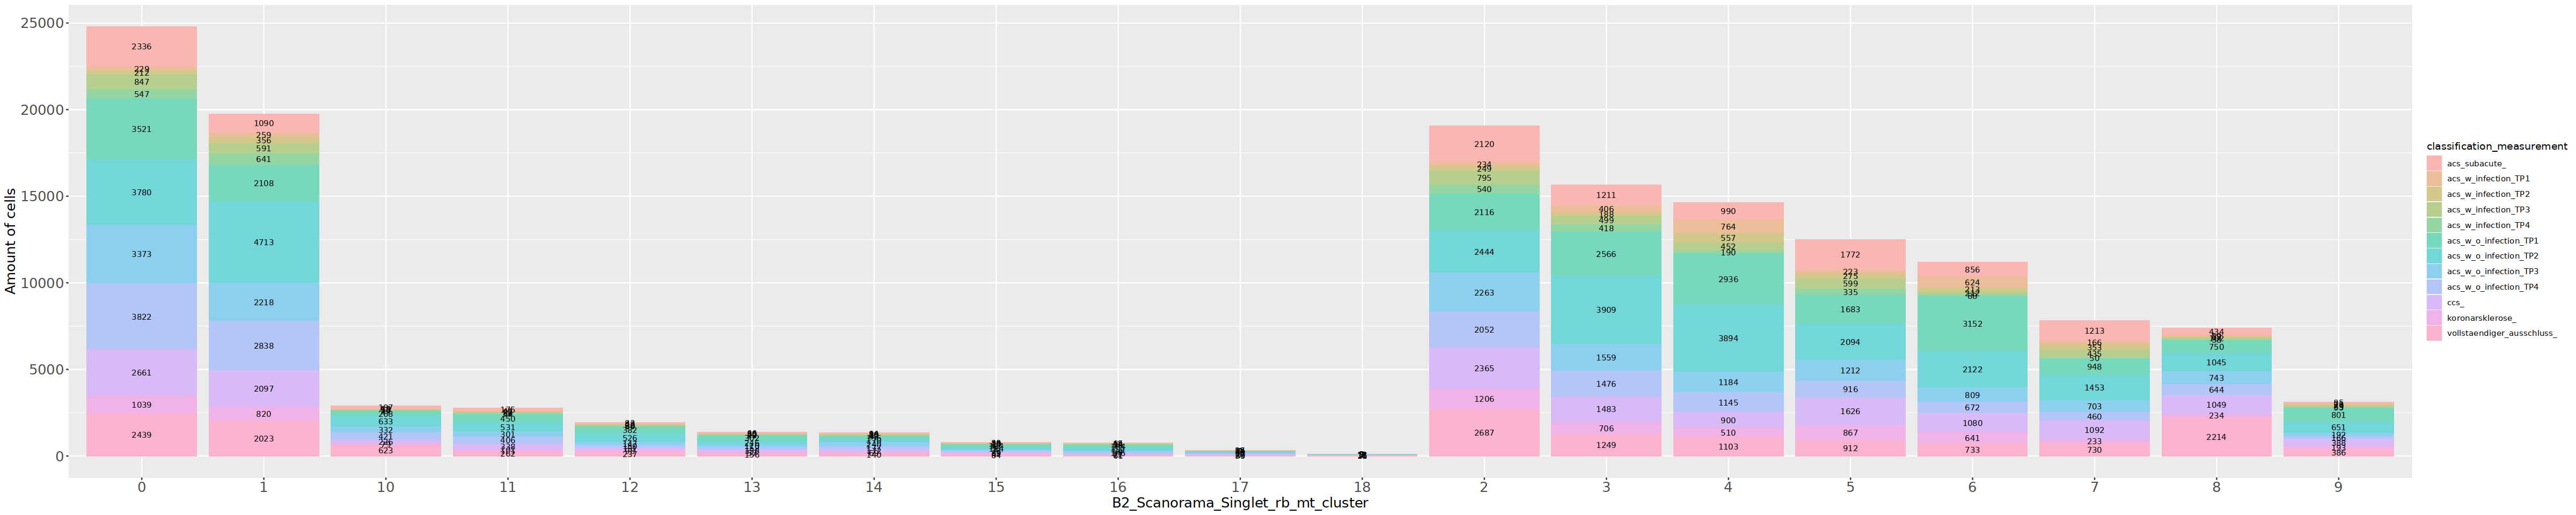

In [218]:
dis = calculate_and_plot_distribution( totalgroup = 'classification_measurement', grouping = 'B2_Scanorama_Singlet_rb_mt_cluster', data_for_analysis =  data_for_analysis_list[[variant]], percentage = FALSE)

In [219]:
### Save the plots 

In [220]:
#dis = calculate_and_plot_distribution( totalgroup ='classification_measurement', grouping = 'B2_Scanorama_Singlet_rb_mt_cluster', data_for_analysis =  data_for_analysis_list[[variant]],plot_width= 30, plot_height = 8, save = TRUE, percentage = FALSE, save_name = 'B4_Symptom_Distribution_classification_measurement_B2_Scanorama_Singlet_rb_mt_cluster_absolute')

In [221]:
#dis = calculate_and_plot_distribution( totalgroup ='group_y', grouping = 'B2_Scanorama_Singlet_rb_mt_cluster', data_for_analysis =  data_for_analysis_list[[variant]],plot_width= 30, plot_height = 8, save = TRUE, percentage = FALSE, save_name = 'B4_Symptom_Distribution_group_B2_Scanorama_Singlet_rb_mt_cluster_absolute')

In [222]:
#dis = calculate_and_plot_distribution( totalgroup = 'classification_measurement', grouping = 'B2_Scanorama_Singlet_rb_mt_cluster', data_for_analysis =  data_for_analysis_list[[variant]],plot_width= 30, plot_height = 8, save = TRUE, save_name = 'B4_Symptom_Distribution_classification_measurement_B2_Scanorama_Singlet_rb_mt_cluster')

In [223]:
#dis = calculate_and_plot_distribution( totalgroup = 'group_y', grouping = 'B2_Scanorama_Singlet_rb_mt_cluster', data_for_analysis =  data_for_analysis_list[[variant]],plot_width= 30, plot_height = 8, save = TRUE, save_name = 'B4_Symptom_Distribution_group_B2_Scanorama_Singlet_rb_mt_cluster')

### For Scanorama clusters - classification as x 

In [224]:
### Percentages

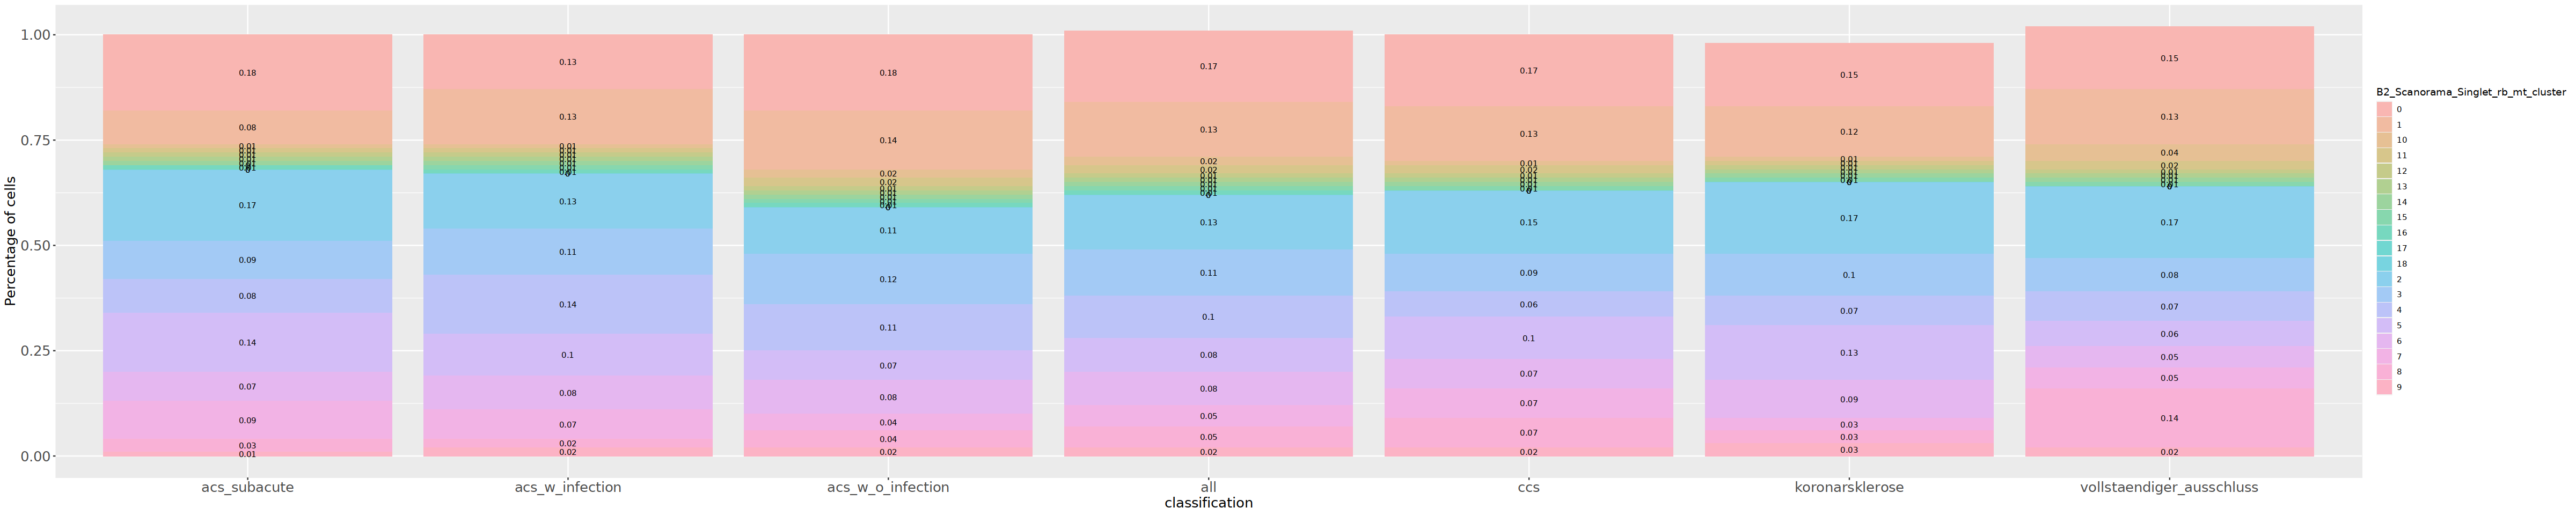

In [225]:
dis = calculate_and_plot_distribution( totalgroup = 'B2_Scanorama_Singlet_rb_mt_cluster', grouping = 'classification' , data_for_analysis =  data_for_analysis_list[[variant]])

In [226]:
### Absolute values

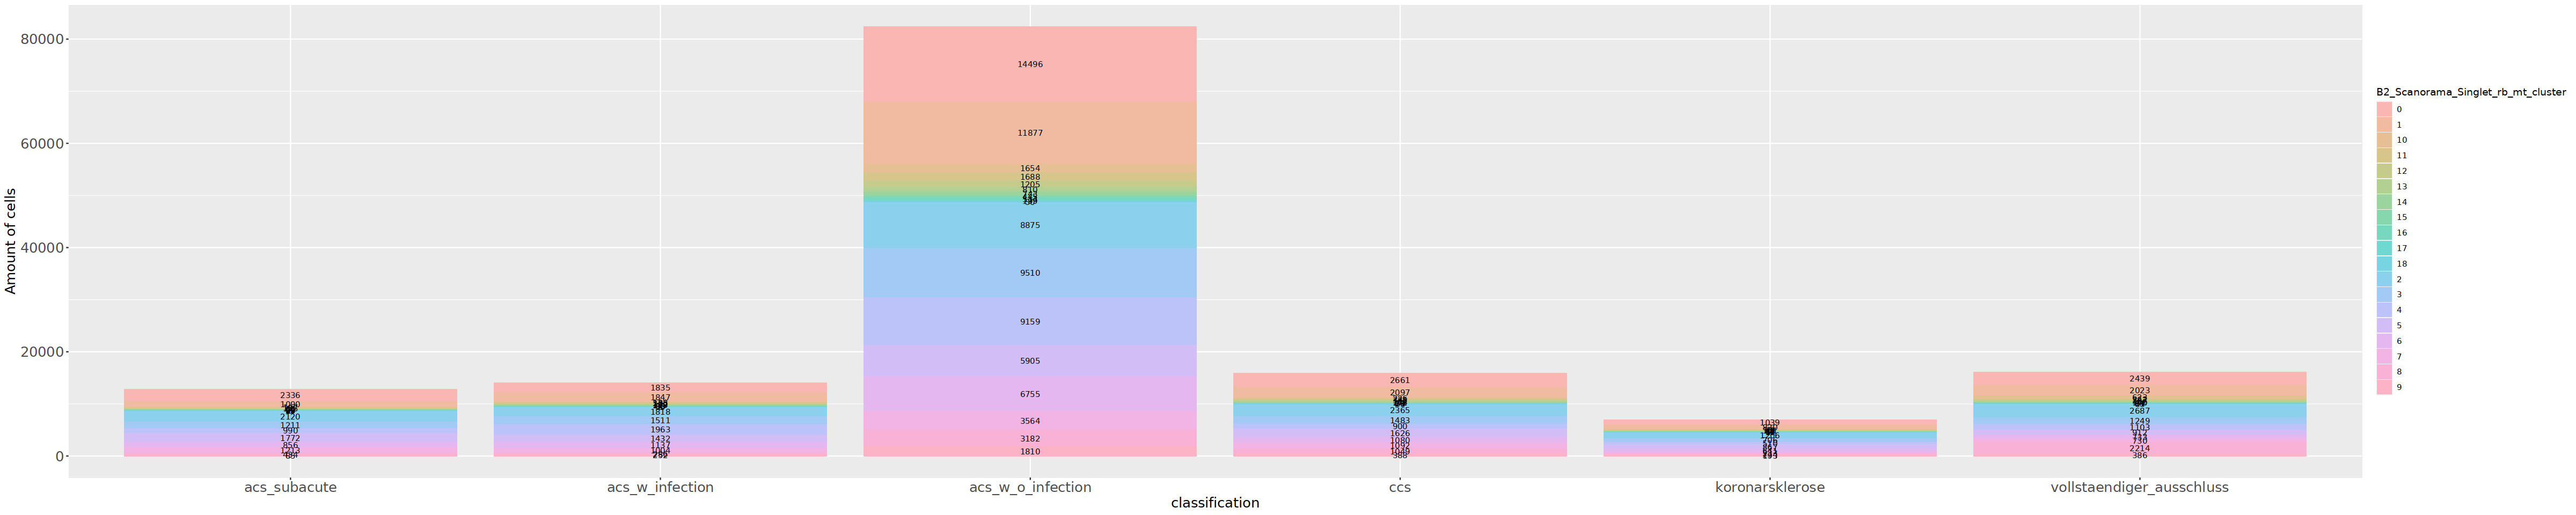

In [227]:
dis = calculate_and_plot_distribution( totalgroup = 'B2_Scanorama_Singlet_rb_mt_cluster', grouping = 'classification' , data_for_analysis =  data_for_analysis_list[[variant]], percentage = FALSE)

In [228]:
### Save the plots 

In [229]:
#dis = calculate_and_plot_distribution( totalgroup = 'B2_Scanorama_Singlet_rb_mt_cluster', grouping = 'classification', data_for_analysis =  data_for_analysis_list[[variant]],plot_width= 30, plot_height = 8, save = TRUE, percentage = FALSE, save_name = 'B4_Cluster_Symptom_Distribution_classification_B2_Scanorama_Singlet_rb_mt_cluster_absolute')

In [230]:
#dis = calculate_and_plot_distribution( totalgroup = 'B2_Scanorama_Singlet_rb_mt_cluster', grouping = 'group_y', data_for_analysis =  data_for_analysis_list[[variant]],plot_width= 30, plot_height = 8, save = TRUE, percentage = FALSE, save_name = 'B4_Cluster_Symptom_Distribution_group_B2_Scanorama_Singlet_rb_mt_cluster_absolute')

In [231]:
#dis = calculate_and_plot_distribution( totalgroup = 'B2_Scanorama_Singlet_rb_mt_cluster', grouping = 'delta_ef_value_group', data_for_analysis =  data_for_analysis_list[[variant]],plot_width= 30, plot_height = 8, save = TRUE, percentage = FALSE, save_name = 'B4_Cluster_Symptom_Distribution_delta_ef_value_group_B2_Scanorama_Singlet_rb_mt_cluster_absolute')

In [232]:
#dis = calculate_and_plot_distribution( totalgroup = 'B2_Scanorama_Singlet_rb_mt_cluster', grouping = 'classification', data_for_analysis =  data_for_analysis_list[[variant]],plot_width= 30, plot_height = 8, save = TRUE, save_name = 'B4_Cluster_Symptom_Distribution_classification_B2_Scanorama_Singlet_rb_mt_cluster')

In [233]:
#dis = calculate_and_plot_distribution( totalgroup = 'B2_Scanorama_Singlet_rb_mt_cluster', grouping = 'group_y', data_for_analysis =  data_for_analysis_list[[variant]],plot_width= 30, plot_height = 8, save = TRUE, save_name = 'B4_Cluster_Symptom_Distribution_group_B2_Scanorama_Singlet_rb_mt_cluster')

In [234]:
#dis = calculate_and_plot_distribution( totalgroup = 'B2_Scanorama_Singlet_rb_mt_cluster', grouping = 'delta_ef_value_group', data_for_analysis =  data_for_analysis_list[[variant]],plot_width= 30, plot_height = 8, save = TRUE, save_name = 'B4_Cluster_Symptom_Distribution_delta_ef_value_group_B2_Scanorama_Singlet_rb_mt_cluster')

### For Scanorama clusters - classification_measurement as x 

In [235]:
### Percentages

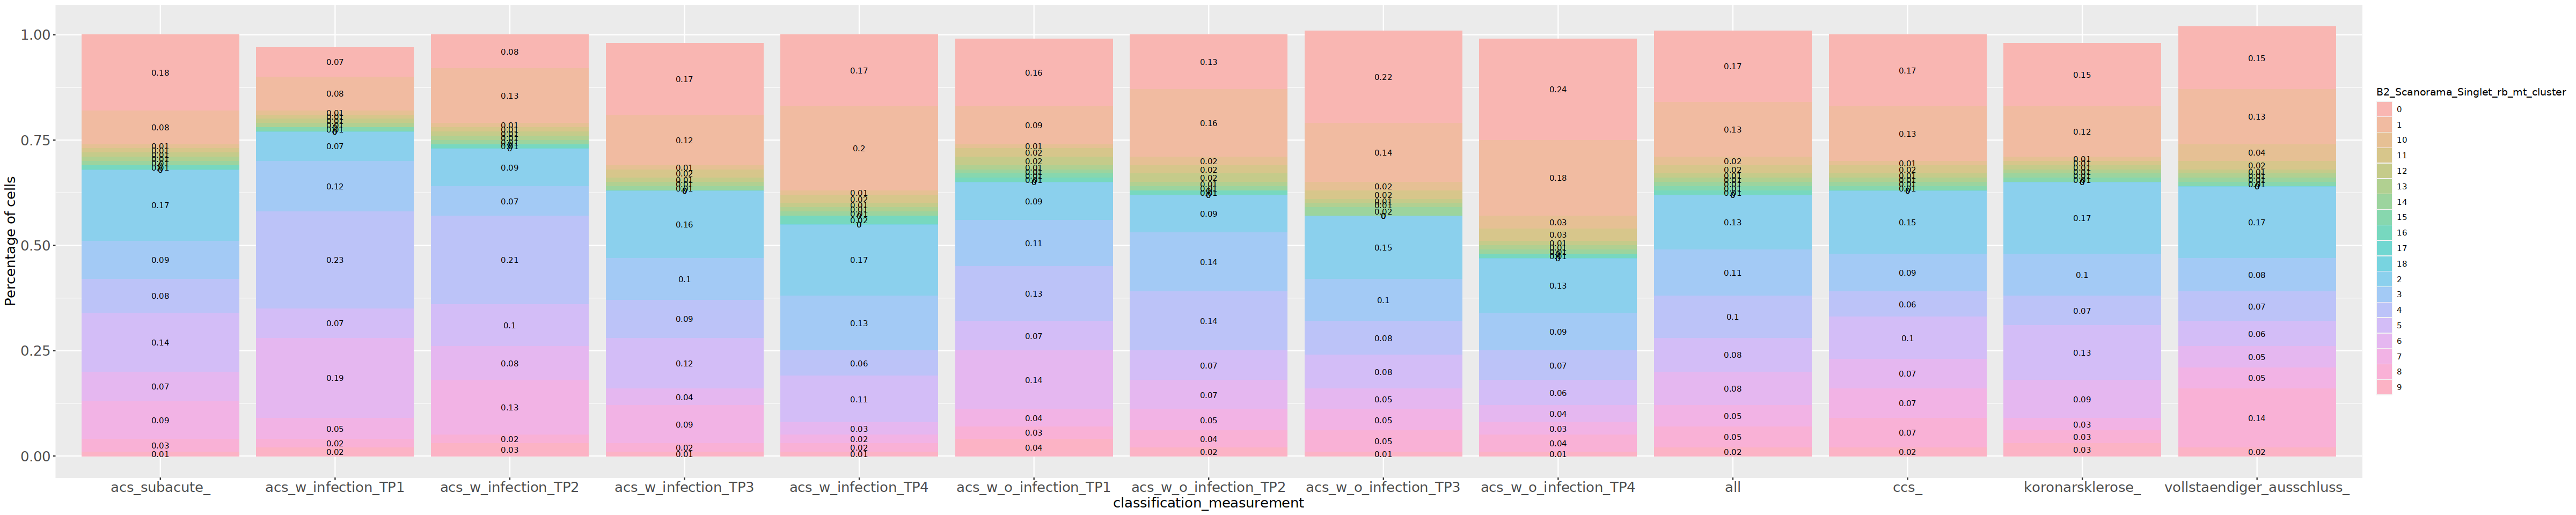

In [236]:
dis = calculate_and_plot_distribution( totalgroup = 'B2_Scanorama_Singlet_rb_mt_cluster', grouping = 'classification_measurement' , data_for_analysis =  data_for_analysis_list[[variant]])

In [237]:
### Absolute values

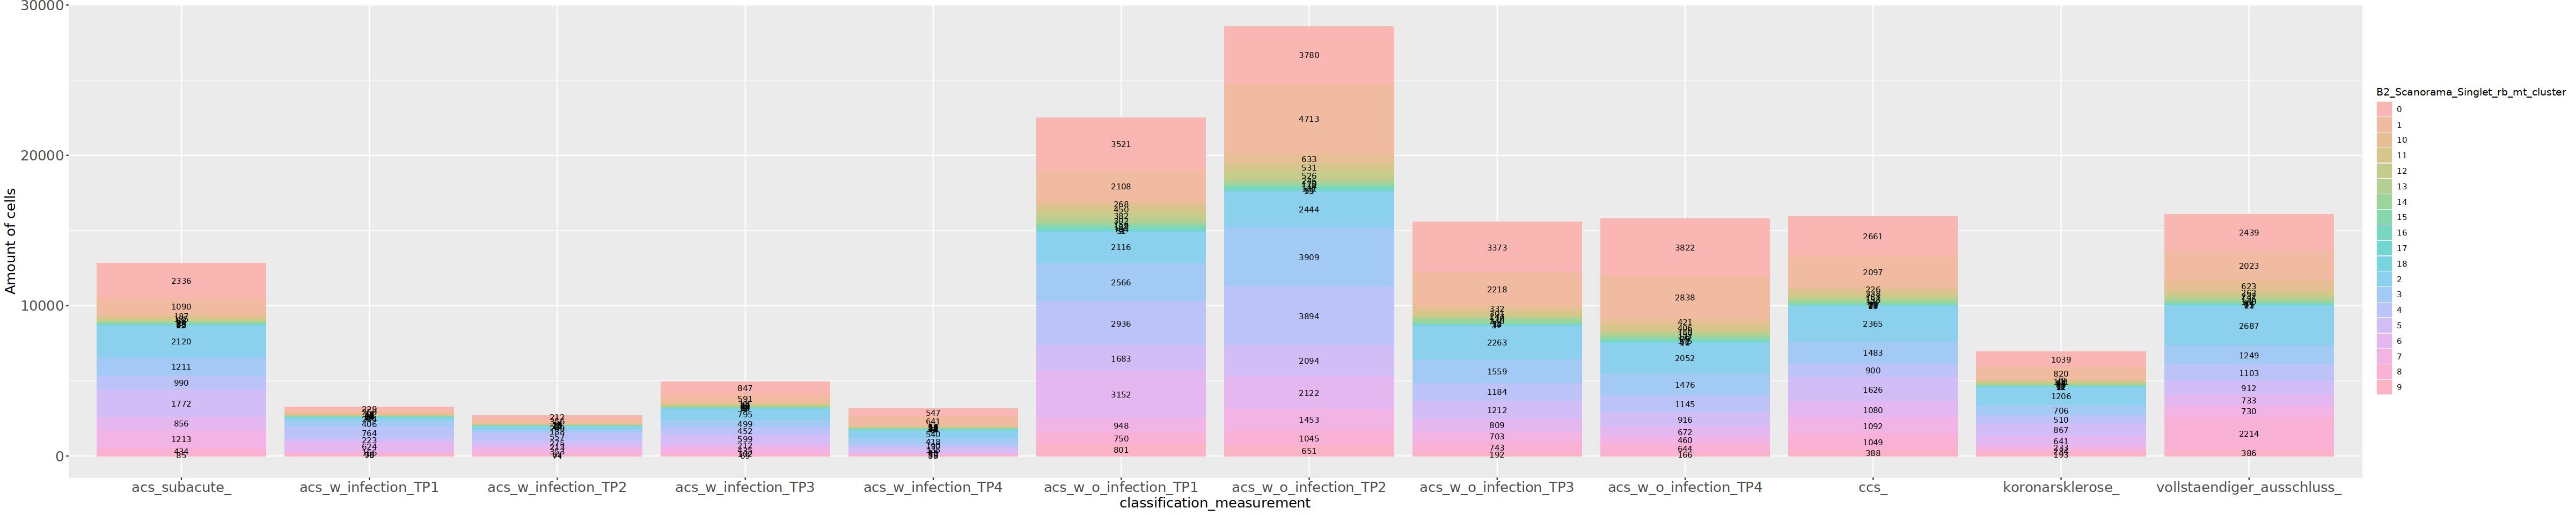

In [238]:
dis = calculate_and_plot_distribution( totalgroup = 'B2_Scanorama_Singlet_rb_mt_cluster', grouping = 'classification_measurement' , data_for_analysis =  data_for_analysis_list[[variant]], percentage = FALSE)

In [239]:
### Save the plots 

In [240]:
#dis = calculate_and_plot_distribution( totalgroup = 'B2_Scanorama_Singlet_rb_mt_cluster', grouping = 'classification_measurement', data_for_analysis =  data_for_analysis_list[[variant]],plot_width= 30, plot_height = 8, save = TRUE, percentage = FALSE, save_name = 'B4_Cluster_Symptom_Distribution_classification_measurement_B2_Scanorama_Singlet_rb_mt_cluster_absolute')

In [241]:
#dis = calculate_and_plot_distribution( totalgroup = 'B2_Scanorama_Singlet_rb_mt_cluster', grouping = 'classification_measurement', data_for_analysis =  data_for_analysis_list[[variant]],plot_width= 30, plot_height = 8, save = TRUE, save_name = 'B4_Cluster_Symptom_Distribution_classification_measurement_B2_Scanorama_Singlet_rb_mt_cluster')

### For Scanorama annotations - annotation as x - classification as y

In [242]:
### Percentages

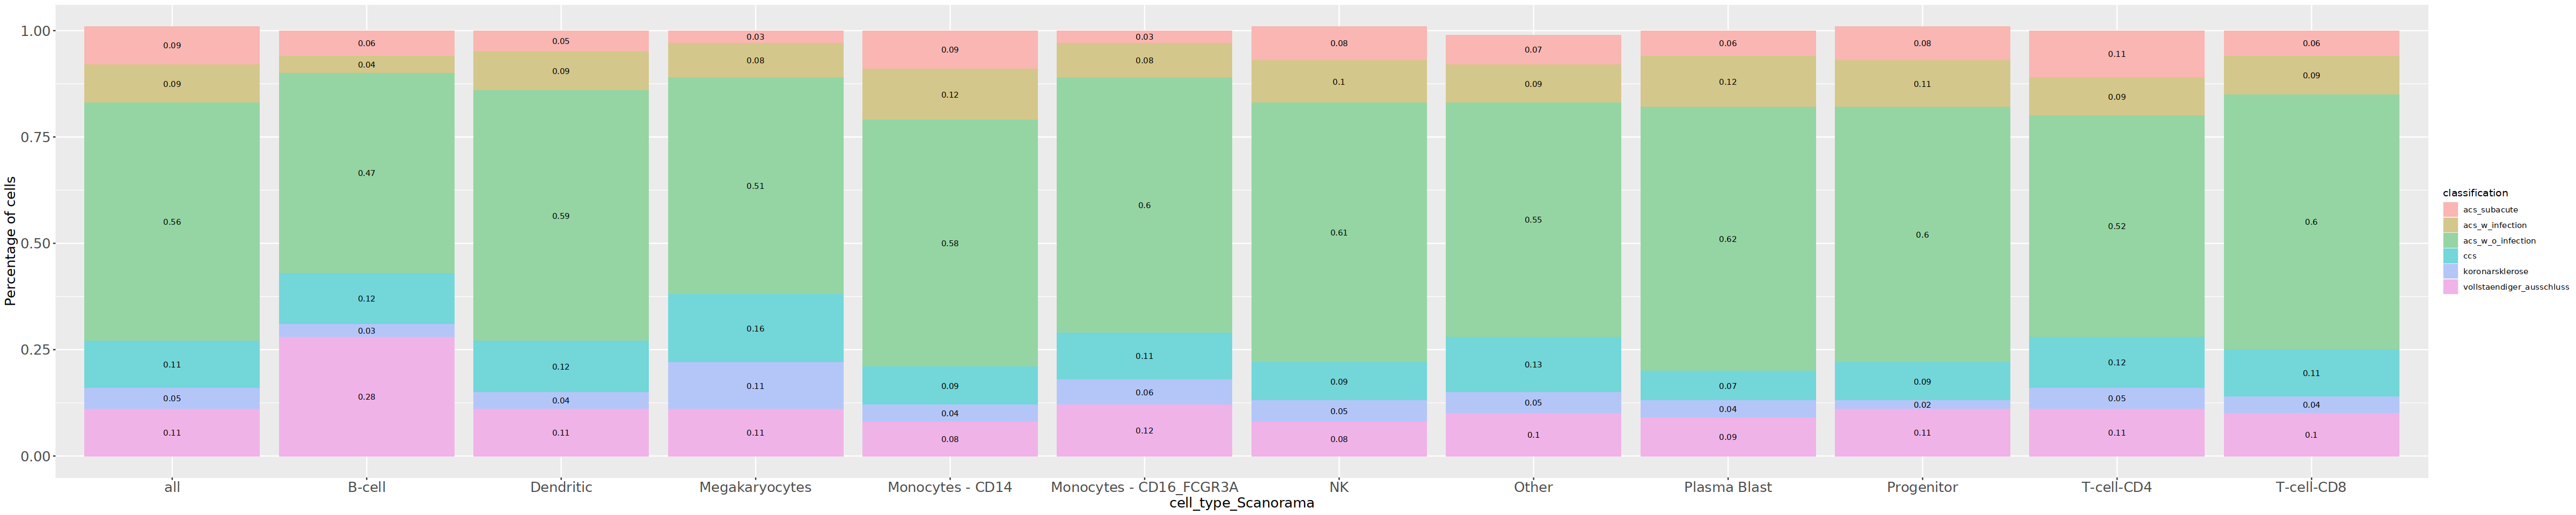

In [243]:
dis = calculate_and_plot_distribution( totalgroup = 'classification', grouping = 'cell_type_Scanorama', data_for_analysis =  data_for_analysis_list[[variant]])

In [244]:
### Absolute values

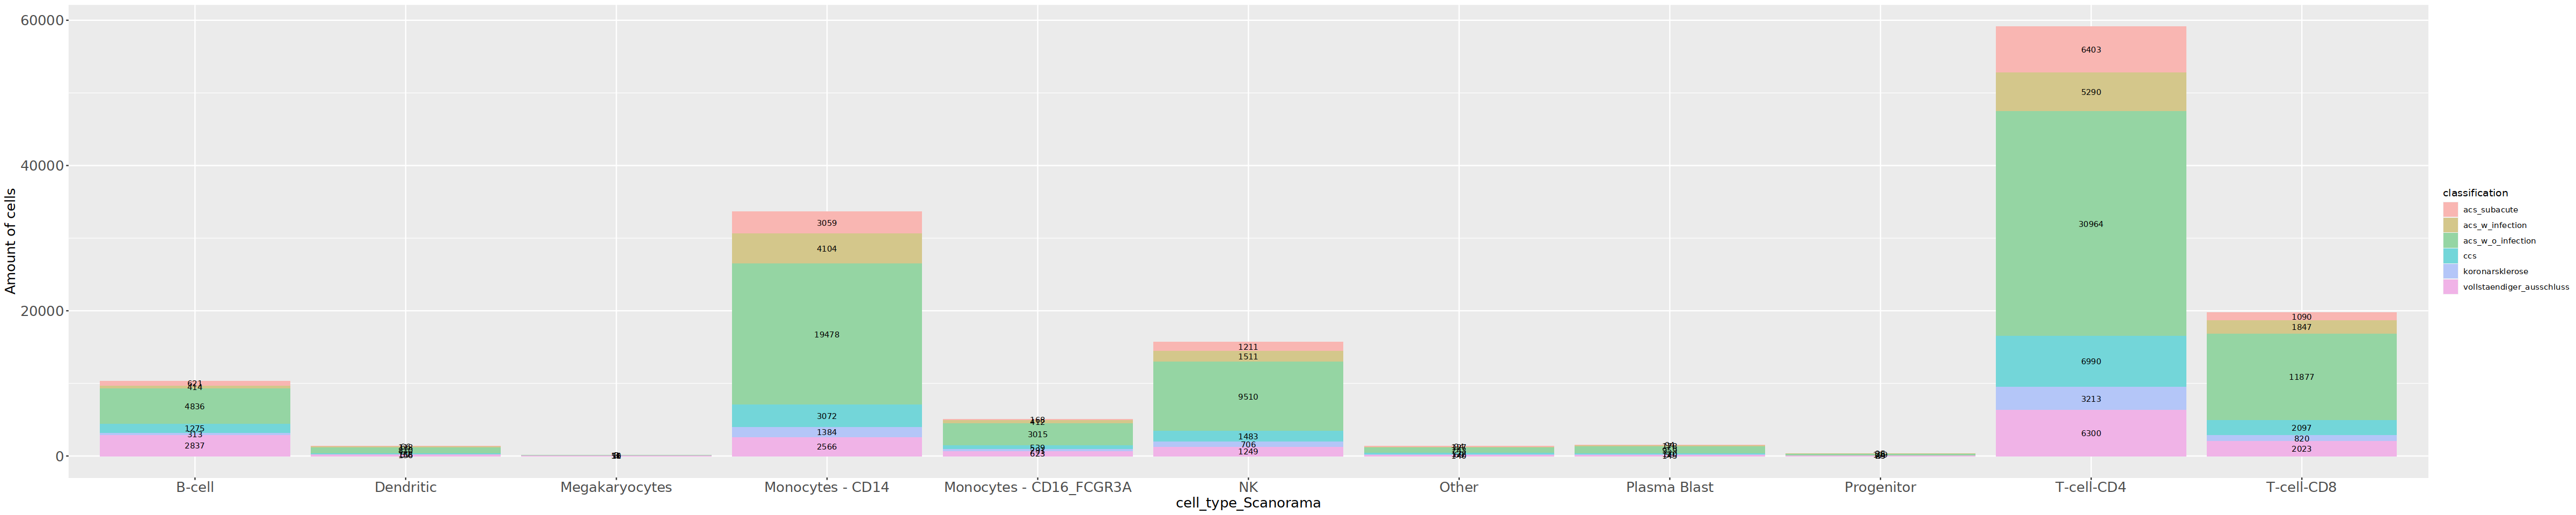

In [245]:
dis = calculate_and_plot_distribution( totalgroup = 'classification', grouping = 'cell_type_Scanorama', data_for_analysis =  data_for_analysis_list[[variant]], percentage = FALSE)

In [246]:
### Save the plots 

In [247]:
#dis = calculate_and_plot_distribution( totalgroup = 'classification', grouping = 'cell_type_Scanorama', data_for_analysis =  data_for_analysis_list[[variant]],plot_width= 30, plot_height = 8, save = TRUE, percentage = FALSE, save_name = 'B4_Cluster_Symptom_Distribution_classification_B2_cell_type_Scanorama_absolute')

In [248]:
#dis = calculate_and_plot_distribution( totalgroup = 'group_y', grouping = 'cell_type_Scanorama', data_for_analysis =  data_for_analysis_list[[variant]],plot_width= 30, plot_height = 8, save = TRUE, percentage = FALSE, save_name = 'B4_Cluster_Symptom_Distribution_group_B2_cell_type_Scanorama_absolute')

In [249]:
#dis = calculate_and_plot_distribution( totalgroup = 'delta_ef_value_group', grouping = 'cell_type_Scanorama', data_for_analysis =  data_for_analysis_list[[variant]],plot_width= 30, plot_height = 8, save = TRUE, percentage = FALSE, save_name = 'B4_Cluster_Symptom_Distribution_delta_ef_value_group_B2_cell_type_Scanorama_absolute')

In [250]:
#dis = calculate_and_plot_distribution( totalgroup = 'classification', grouping = 'cell_type_Scanorama', data_for_analysis =  data_for_analysis_list[[variant]],plot_width= 30, plot_height = 8, save = TRUE, save_name = 'B4_Cluster_Symptom_Distribution_classification_B2_cell_type_Scanorama')

In [251]:
#dis = calculate_and_plot_distribution( totalgroup = 'group_y', grouping = 'cell_type_Scanorama', data_for_analysis =  data_for_analysis_list[[variant]],plot_width= 30, plot_height = 8, save = TRUE, save_name = 'B4_Cluster_Symptom_Distribution_group_B2_cell_type_Scanorama')

In [252]:
#dis = calculate_and_plot_distribution( totalgroup = 'delta_ef_value_group', grouping = 'cell_type_Scanorama', data_for_analysis =  data_for_analysis_list[[variant]],plot_width= 30, plot_height = 8, save = TRUE, save_name = 'B4_Cluster_Symptom_Distribution_delta_ef_value_group_B2_cell_type_Scanorama')

### For Scanorama annotations - annotation as x - classification_measurement as y

In [253]:
### Percentages

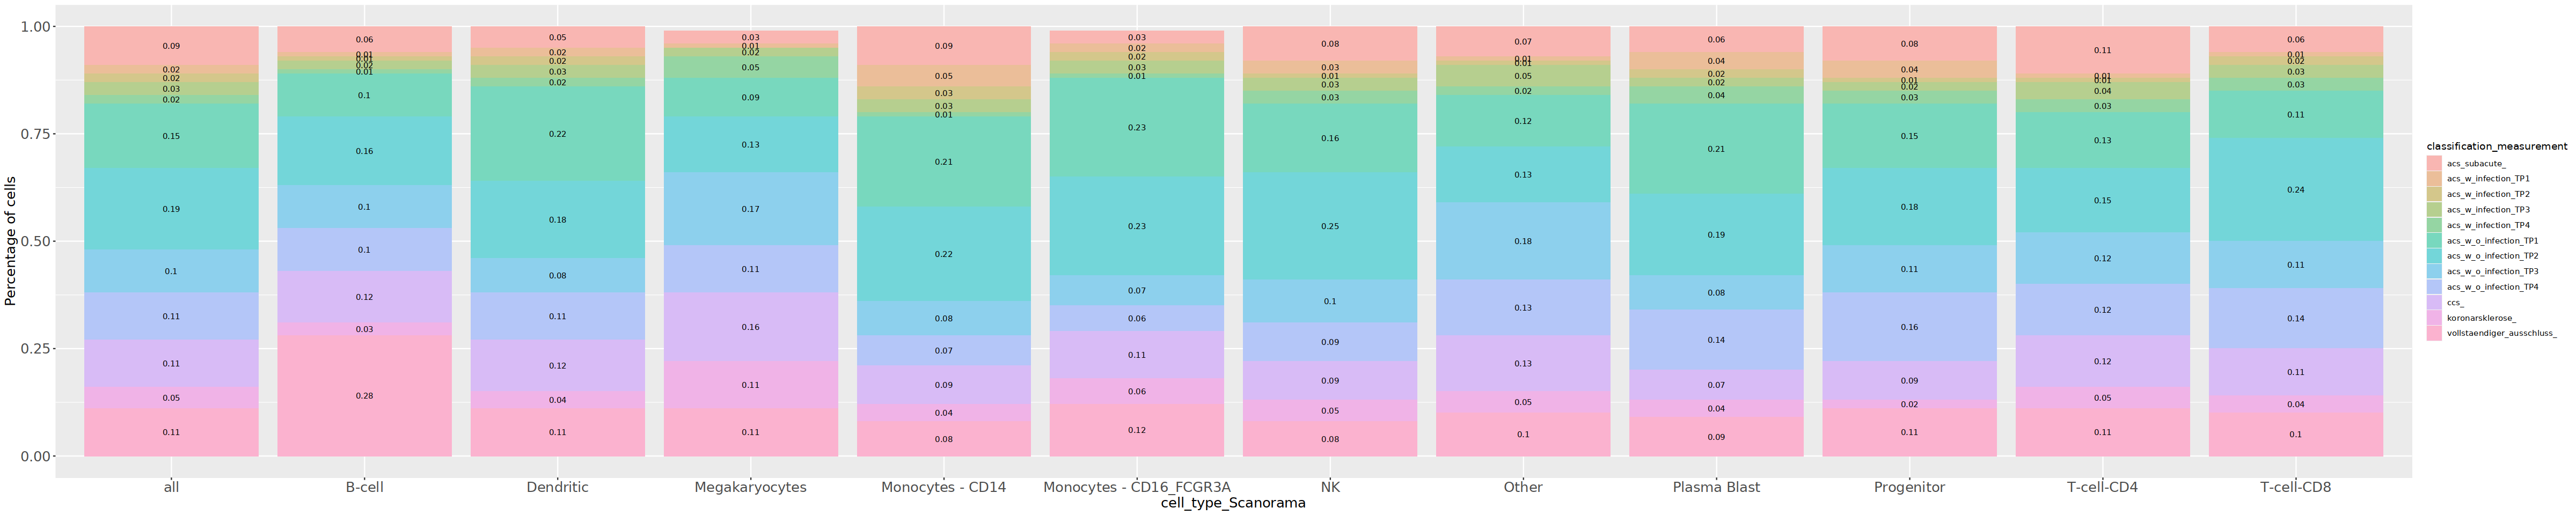

In [254]:
dis = calculate_and_plot_distribution( totalgroup = 'classification_measurement', grouping = 'cell_type_Scanorama', data_for_analysis =  data_for_analysis_list[[variant]])

In [255]:
### Absolute values

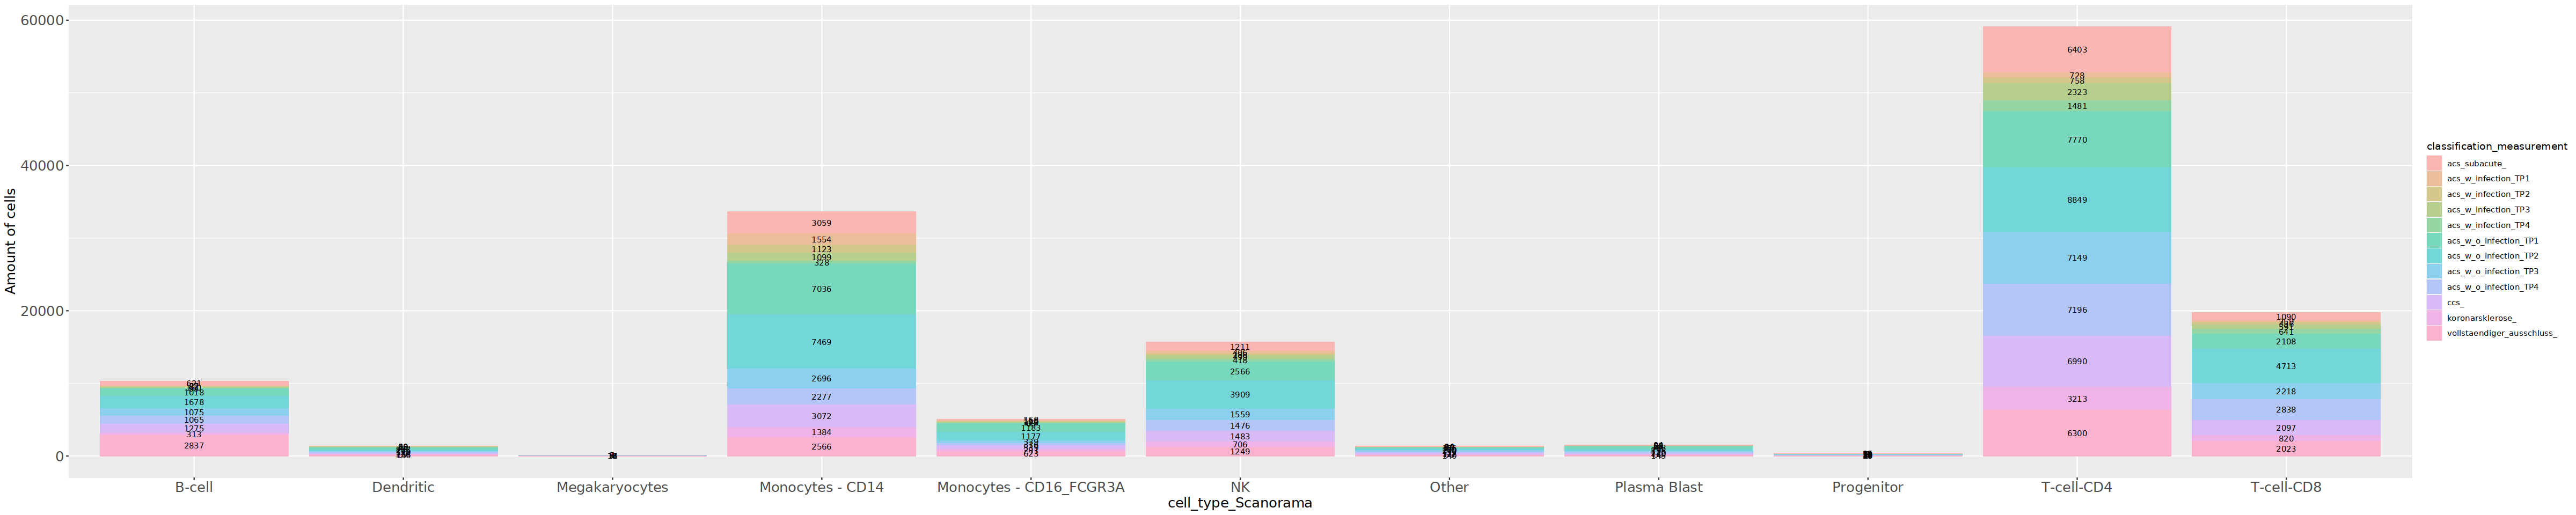

In [256]:
dis = calculate_and_plot_distribution( totalgroup = 'classification_measurement', grouping = 'cell_type_Scanorama', data_for_analysis =  data_for_analysis_list[[variant]], percentage = FALSE)

In [257]:
### Save the plots 

In [258]:
#dis = calculate_and_plot_distribution( totalgroup = 'classification_measurement', grouping = 'cell_type_Scanorama', data_for_analysis =  data_for_analysis_list[[variant]],plot_width= 30, plot_height = 8, save = TRUE, percentage = FALSE, save_name = 'B4_Cluster_Symptom_Distribution_classification_measurement_B2_cell_type_Scanorama_absolute')

In [259]:
#dis = calculate_and_plot_distribution( totalgroup = 'classification_measurement', grouping = 'cell_type_Scanorama', data_for_analysis =  data_for_analysis_list[[variant]],plot_width= 30, plot_height = 8, save = TRUE, save_name = 'B4_Cluster_Symptom_Distribution_classification_measurement_B2_cell_type_Scanorama')

### For Scanorama annotations - classification as y - annotation as x

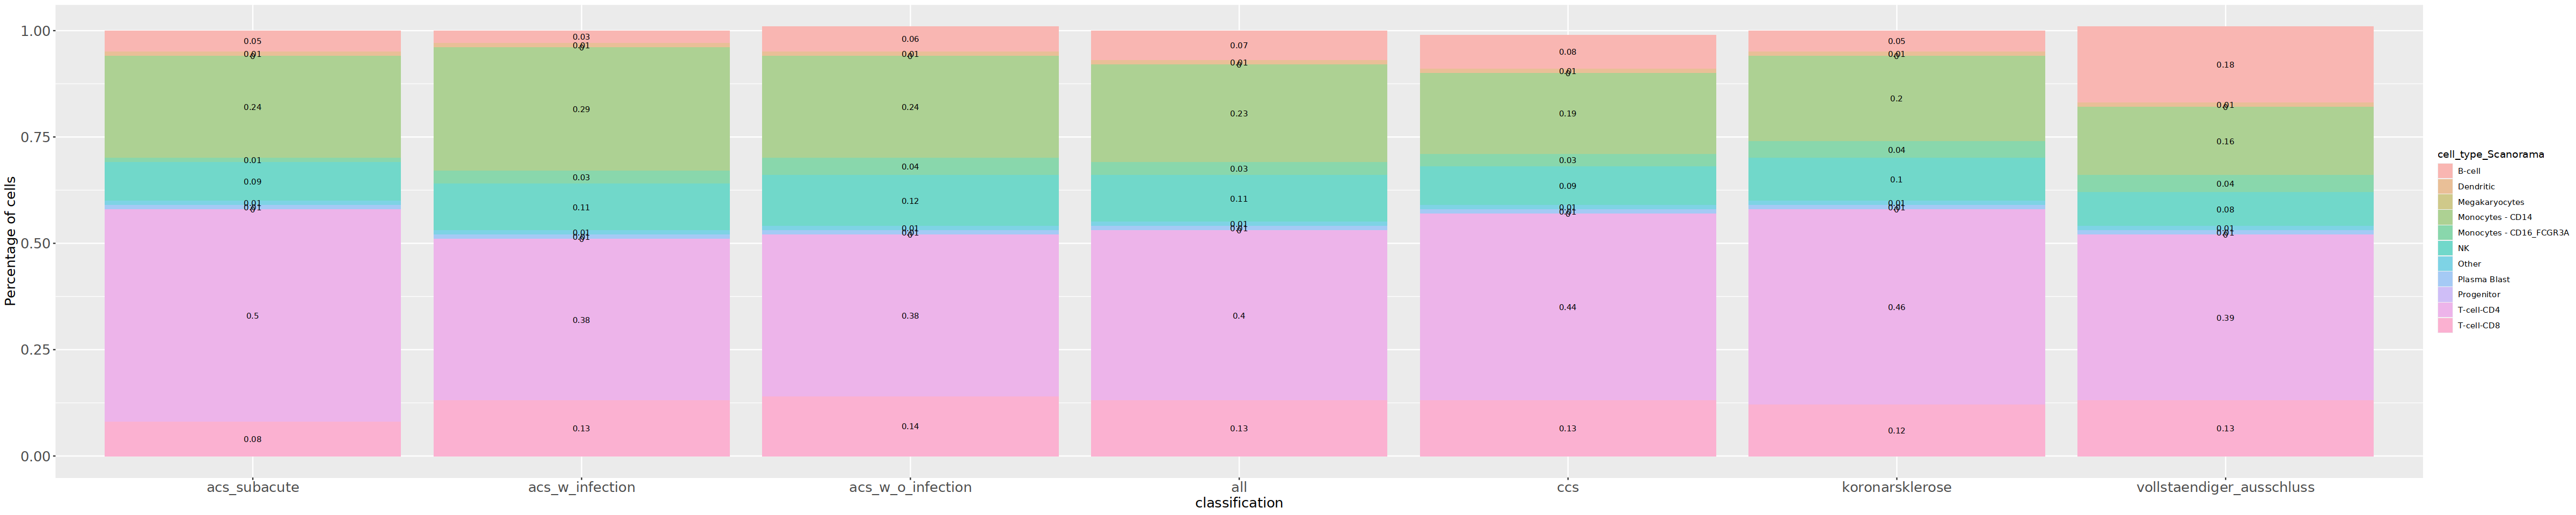

In [260]:
dis = calculate_and_plot_distribution(totalgroup = 'cell_type_Scanorama', grouping = 'classification', data_for_analysis =  data_for_analysis_list[[variant]])

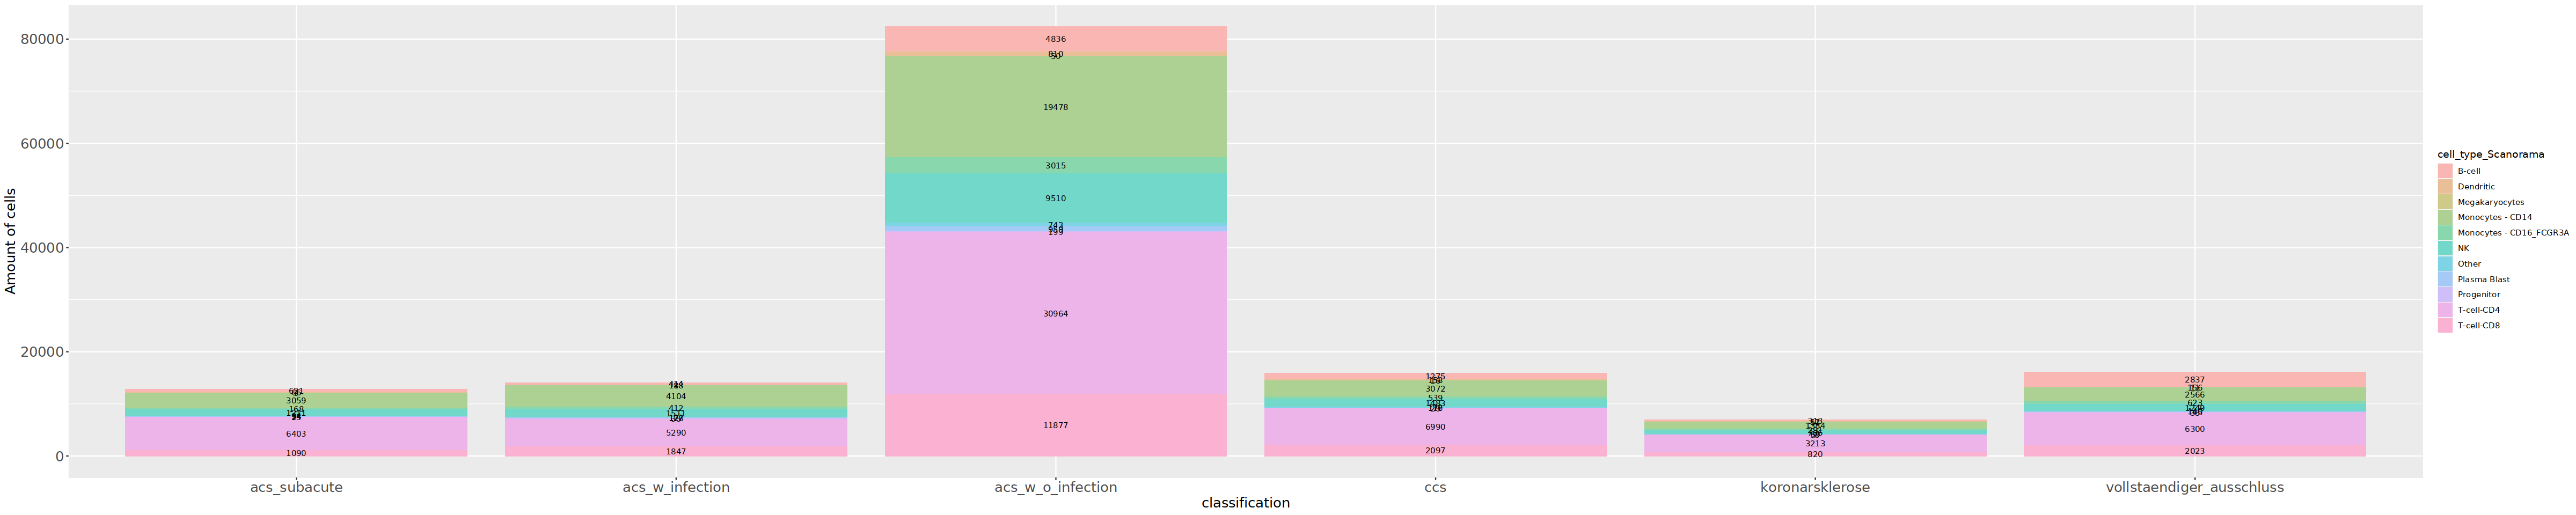

In [261]:
dis = calculate_and_plot_distribution(totalgroup = 'cell_type_Scanorama', grouping = 'classification', data_for_analysis =  data_for_analysis_list[[variant]], percentage = FALSE)

# Compare different clustering variants (rand-index)

In [118]:
#### Randomly assing numbers between 1 and 20 to cells

In [119]:
variants

[1] "V1_Singlet"

## Choose Clusterings to compare

In [120]:
## Check out available clusterings

In [121]:
colnames(data_for_analysis)[grep("cluster",colnames(data_for_analysis))]

[1] "A7_PCA_50_10_neighbors_cluster"                      
 [2] "A7_PCA_100_10_neighbors_cluster"                     
 [3] "A7_PCA_100_50_neighbors_cluster"                     
 [4] "A7_PCA_500_50_neighbors_cluster"                     
 [5] "A7_Singlet_PCA_50_10_neighbors_cluster"              
 [6] "A7_Singlet_PCA_100_10_neighbors_cluster"             
 [7] "A7_Singlet_RB_MT_PCA_50_10_neighbors_cluster"        
 [8] "A7_Singlet_RB_MT_PCA_100_10_neighbors_cluster"       
 [9] "B2_Concat_Singlet_PCA_50_10_neighbors_cluster"       
[10] "B2_Concat_Singlet_PCA_100_10_neighbors_cluster"      
[11] "B2_Concat_Singlet_RB_MT_PCA_50_10_neighbors_cluster" 
[12] "B2_Concat_Singlet_RB_MT_PCA_100_10_neighbors_cluster"
[13] "cluster_cell_type"                                   
[14] "cluster_cell_type_concat.."                          
[15] "B2_Scanorama_Singlet_cluster"                        
[16] "B2_Scanorama_Singlet_rb_mt_cluster"                  
[17] "cluster_cell_type_Scanorama"

In [122]:
### Library based clustering for L1

In [123]:
version1  = 'Lib'

In [124]:
cluster_name_v1 = 'A7_Singlet_RB_MT_PCA_50_10_neighbors_cluster'

In [165]:
### Scanorama Clustering on complete data

In [166]:
version2 =  'Scano'

In [167]:
cluster_name_v2 =  'B2_Scanorama_Singlet_cluster'

In [168]:
### Name of the comparison

In [169]:
comparison_name = 'Scano_vs_Lib_100_rb_mt'

In [170]:
### Define whether to calculate adjusted rand index

In [171]:
adjusted = TRUE

## Calculate Rand Index for choosen comparison

In [172]:
#### Calculate Rand Index for choosen comparison
# alternative: adj.rand.index()
# in order to inspect results later - different combintions of comparisons need to be chosen

In [173]:
head(rand_index_results)

<0 x 0 matrix>

In [174]:
rand_index_results = rand_index_results[, !colnames(rand_index_results) %in% colnames(rand_index_results)[(grep("X",colnames(rand_index_results)))]]

In [175]:
execution_date = Sys.time()

for (lib in libraries){
    #print(lib)
    
    ### Reduce the data to relevant columns and rows
    clusters_v1 = data_for_analysis[data_for_analysis$library_id == lib ,c('X', cluster_name_v1)]
    clusters_v2 = data_for_analysis[data_for_analysis$library_id == lib,c('X', cluster_name_v2)]
    
    ### Join the datasets which should be compared
    cluster_comparison = merge(clusters_v1, clusters_v2)
    
    #### Calculate the rand index
    if(adjusted == TRUE){
        rand_index = fossil::adj.rand.index(cluster_comparison[,cluster_name_v1],cluster_comparison[,cluster_name_v2])
    }
    else {
        rand_index = fossil::rand.index(cluster_comparison[,cluster_name_v1],cluster_comparison[,cluster_name_v2])
        }
    
    data_to_save = data.frame(lib, execution_date, rand_index, version1, cluster_name_v1, version2, cluster_name_v2, adjusted)
    # print(data_to_save) - get results printed
    
    data_to_save$comparison =comparison_name
    
    rand_index_results  = rbind(rand_index_results,  data_to_save)
    
    }
    

## Inspect Results

In [176]:
#### Average Rand Index over all libraries  per execution

In [178]:
rand_index_results %>% group_by(comparison,execution_date, version1, cluster_name_v1, version2, cluster_name_v2, adjusted) %>% summarise(avg_rand_index = mean(rand_index))

`summarise()` has grouped output by 'comparison', 'execution_date', 'version1',
'cluster_name_v1', 'version2', 'cluster_name_v2'. You can override using the
`.groups` argument.


comparison             execution_date      version1
1 Scano_vs_Lib_100_rb_mt 2023-01-17 14:49:12 Lib     
  cluster_name_v1                              version2
1 A7_Singlet_RB_MT_PCA_50_10_neighbors_cluster Scano   
  cluster_name_v2              adjusted avg_rand_index
1 B2_Scanorama_Singlet_cluster TRUE     0.5765664

In [179]:
### Plot the adjusted rand index distribution

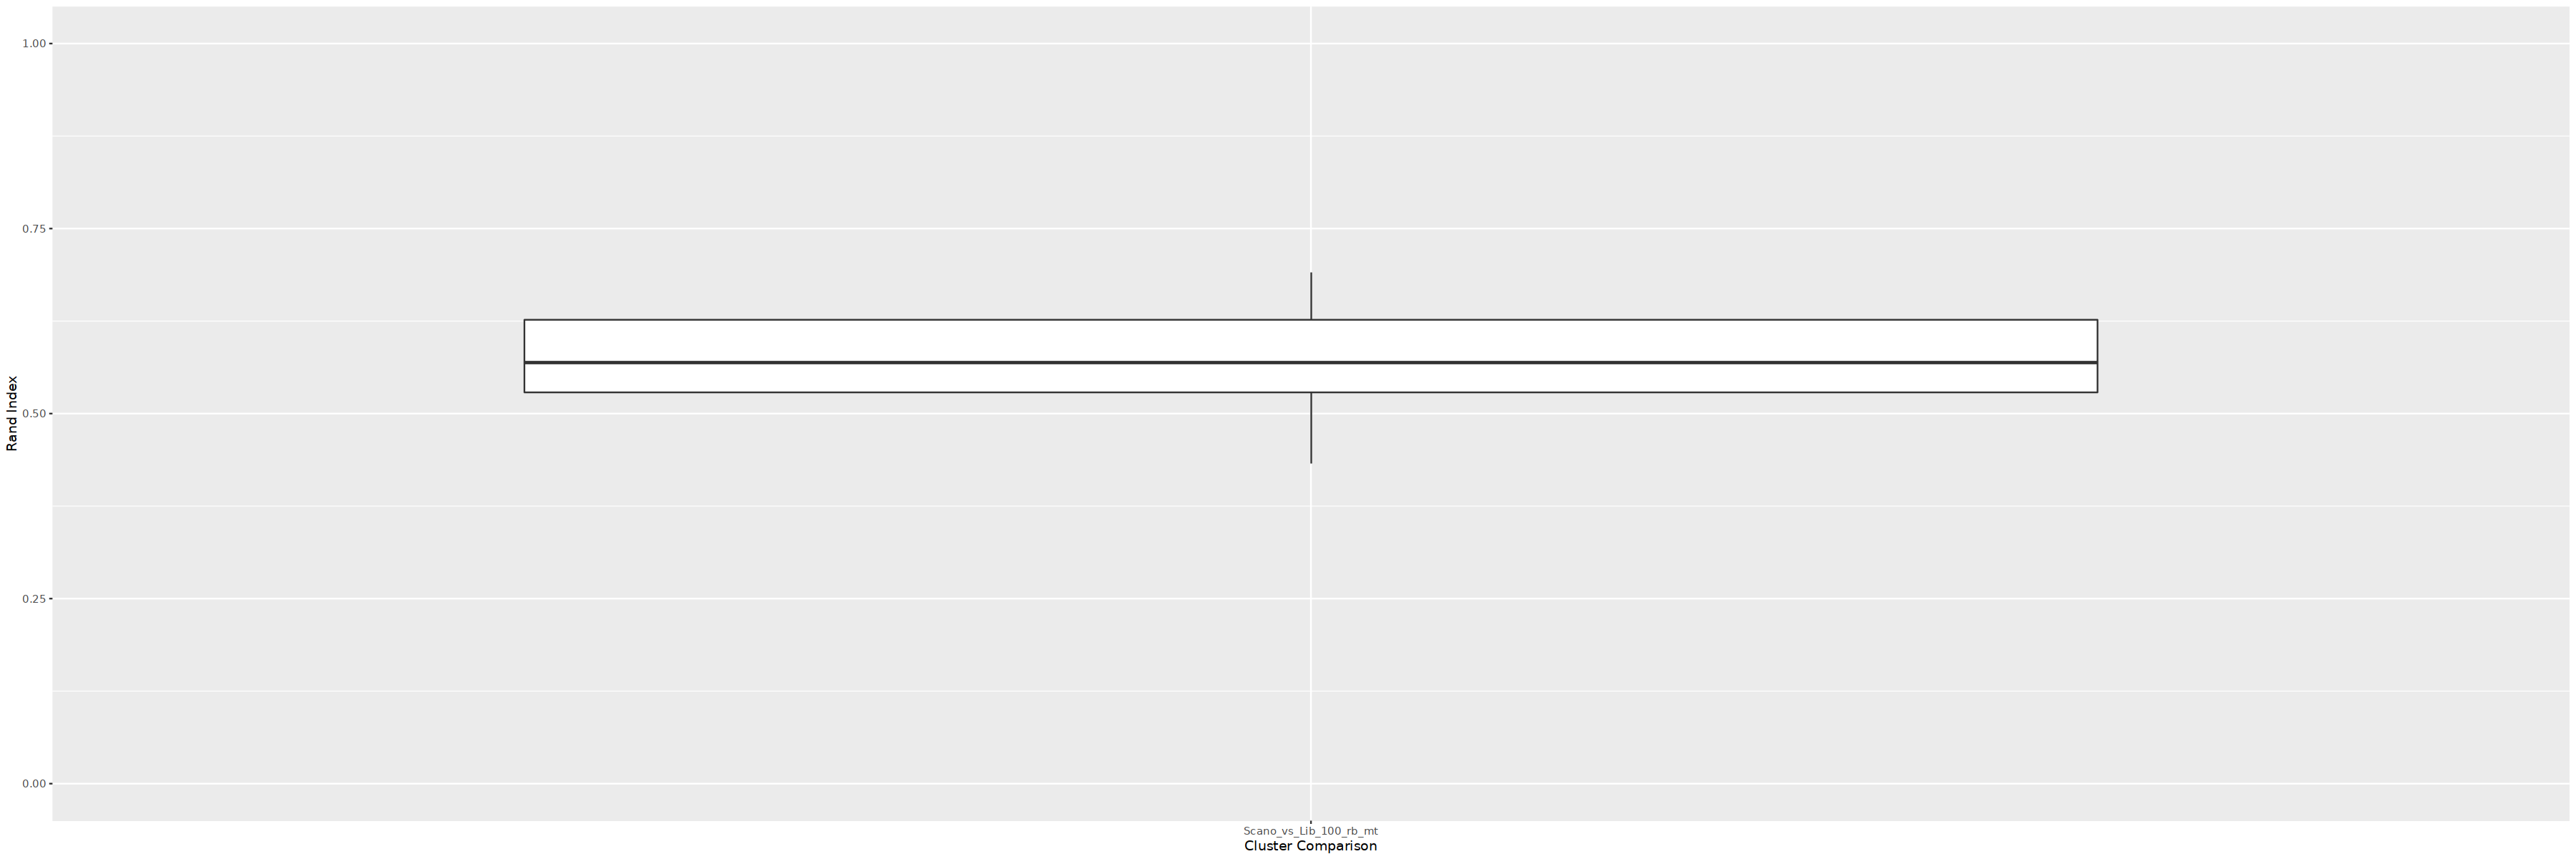

In [180]:
options(repr.plot.width=30, repr.plot.height=10)
ggplot(rand_index_results[rand_index_results$adjusted == TRUE,], aes(x= comparison, y=rand_index)) + ylim(0,1) +  geom_boxplot() +labs(y= "Rand Index", x = "Cluster Comparison")

In [181]:
### Plot the rand index distribution

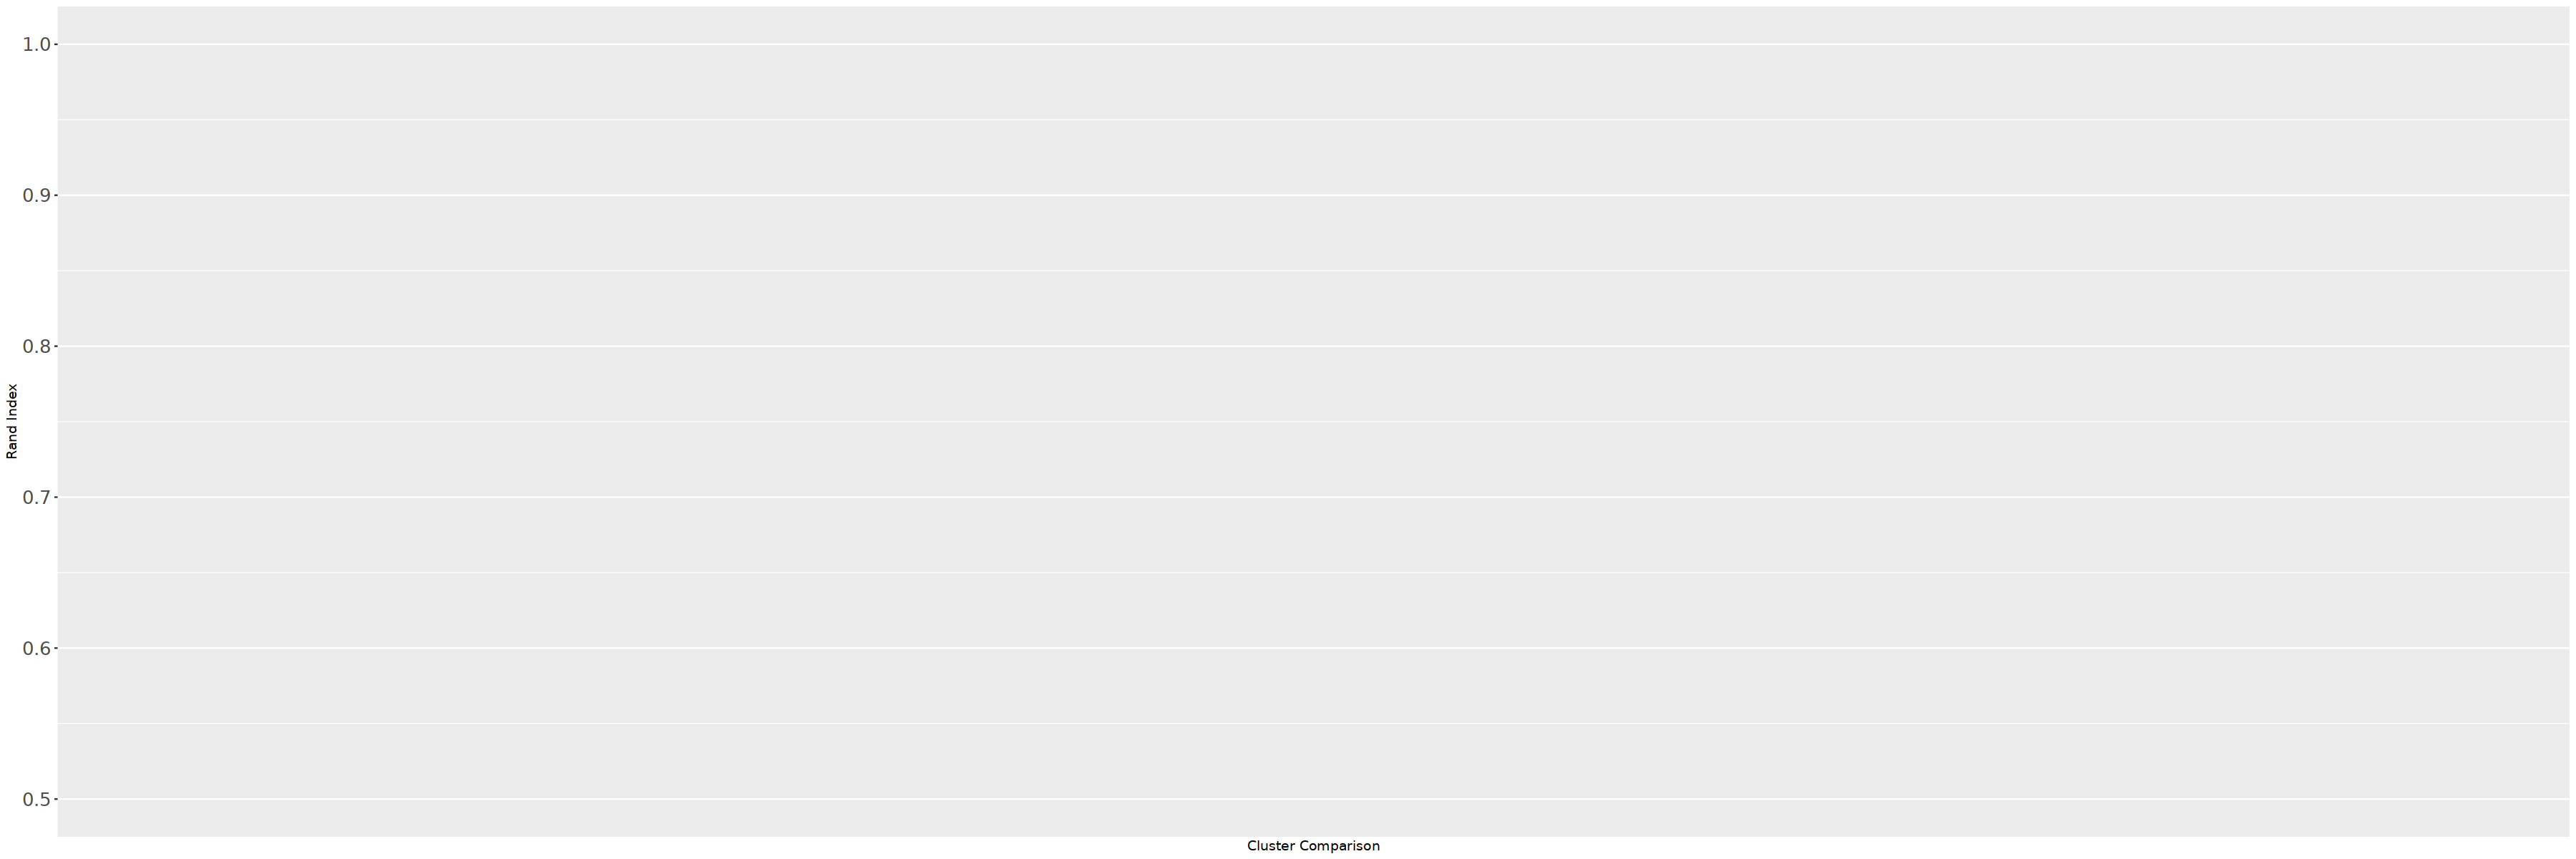

In [182]:
options(repr.plot.width=30, repr.plot.height=10)
ggplot(rand_index_results[rand_index_results$adjusted == FALSE,], aes(x= comparison, y=rand_index)) + ylim(0.5,1)+ geom_boxplot() +labs(y= "Rand Index", x = "Cluster Comparison") + theme(axis.text=element_text(size=15))

## Save the calculated results

In [183]:
#write.csv(rand_index_results, paste(result_path, '/B-Analysis/rand_index_results.csv', sep = ''))

# Confusion Matrix comparison Annotation

In [94]:
## Check out available clusterings & cell-types

In [95]:
colnames(data_for_analysis)[grep("cluster|cell_type",colnames(data_for_analysis))]

[1] "cell_type"                                           
 [2] "A7_PCA_50_10_neighbors_cluster"                      
 [3] "A7_PCA_100_10_neighbors_cluster"                     
 [4] "A7_PCA_100_50_neighbors_cluster"                     
 [5] "A7_PCA_500_50_neighbors_cluster"                     
 [6] "A7_Singlet_PCA_50_10_neighbors_cluster"              
 [7] "A7_Singlet_PCA_100_10_neighbors_cluster"             
 [8] "A7_Singlet_RB_MT_PCA_50_10_neighbors_cluster"        
 [9] "A7_Singlet_RB_MT_PCA_100_10_neighbors_cluster"       
[10] "B2_Concat_Singlet_PCA_50_10_neighbors_cluster"       
[11] "B2_Concat_Singlet_PCA_100_10_neighbors_cluster"      
[12] "B2_Concat_Singlet_RB_MT_PCA_50_10_neighbors_cluster" 
[13] "B2_Concat_Singlet_RB_MT_PCA_100_10_neighbors_cluster"
[14] "cluster_cell_type"                                   
[15] "cell_type_concat.."                                  
[16] "cluster_cell_type_concat.."                          
[17] "B2_Scanorama_Singlet_cluster"                        
[18] "B2_Scanorama_Singlet_rb_mt_cluster"                  
[19] "cell_type_Scanorama"                                 
[20] "cluster_cell_type_Scanorama"

In [96]:
### Library based clustering for L1

In [97]:
version1  = 'Concat'

In [98]:
prediction  ='cell_type_concat..'

In [99]:
prediction_cluster = 'B2_Concat_Singlet_RB_MT_PCA_100_10_neighbors_cluster'

In [100]:
### Scanorama Clustering on complete data

In [101]:
version2 =  'Scanorama'

In [102]:
reference = 'cell_type_Scanorama'

In [103]:
reference_cluster = 'B2_Scanorama_Singlet_rb_mt_cluster'

In [104]:
### Name of the comparison

In [105]:
comparison_name = 'Scano_vs_Concat'

In [106]:
### Calculate confusion matrix

In [107]:
data_for_analysis[,prediction] = as.factor(data_for_analysis[,prediction])

In [108]:
data_for_analysis[,reference] = as.factor(data_for_analysis[,reference])

In [109]:
result = confusionMatrix(data_for_analysis[,prediction],data_for_analysis[,reference])  # TBD

Warning message in levels(reference) != levels(data):
“longer object length is not a multiple of shorter object length”
Warning message in confusionMatrix.default(data_for_analysis[, prediction], data_for_analysis[, :
“Levels are not in the same order for reference and data. Refactoring data to match.”


In [110]:
# result$table

In [111]:
### Visualize Confusion Matrix

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


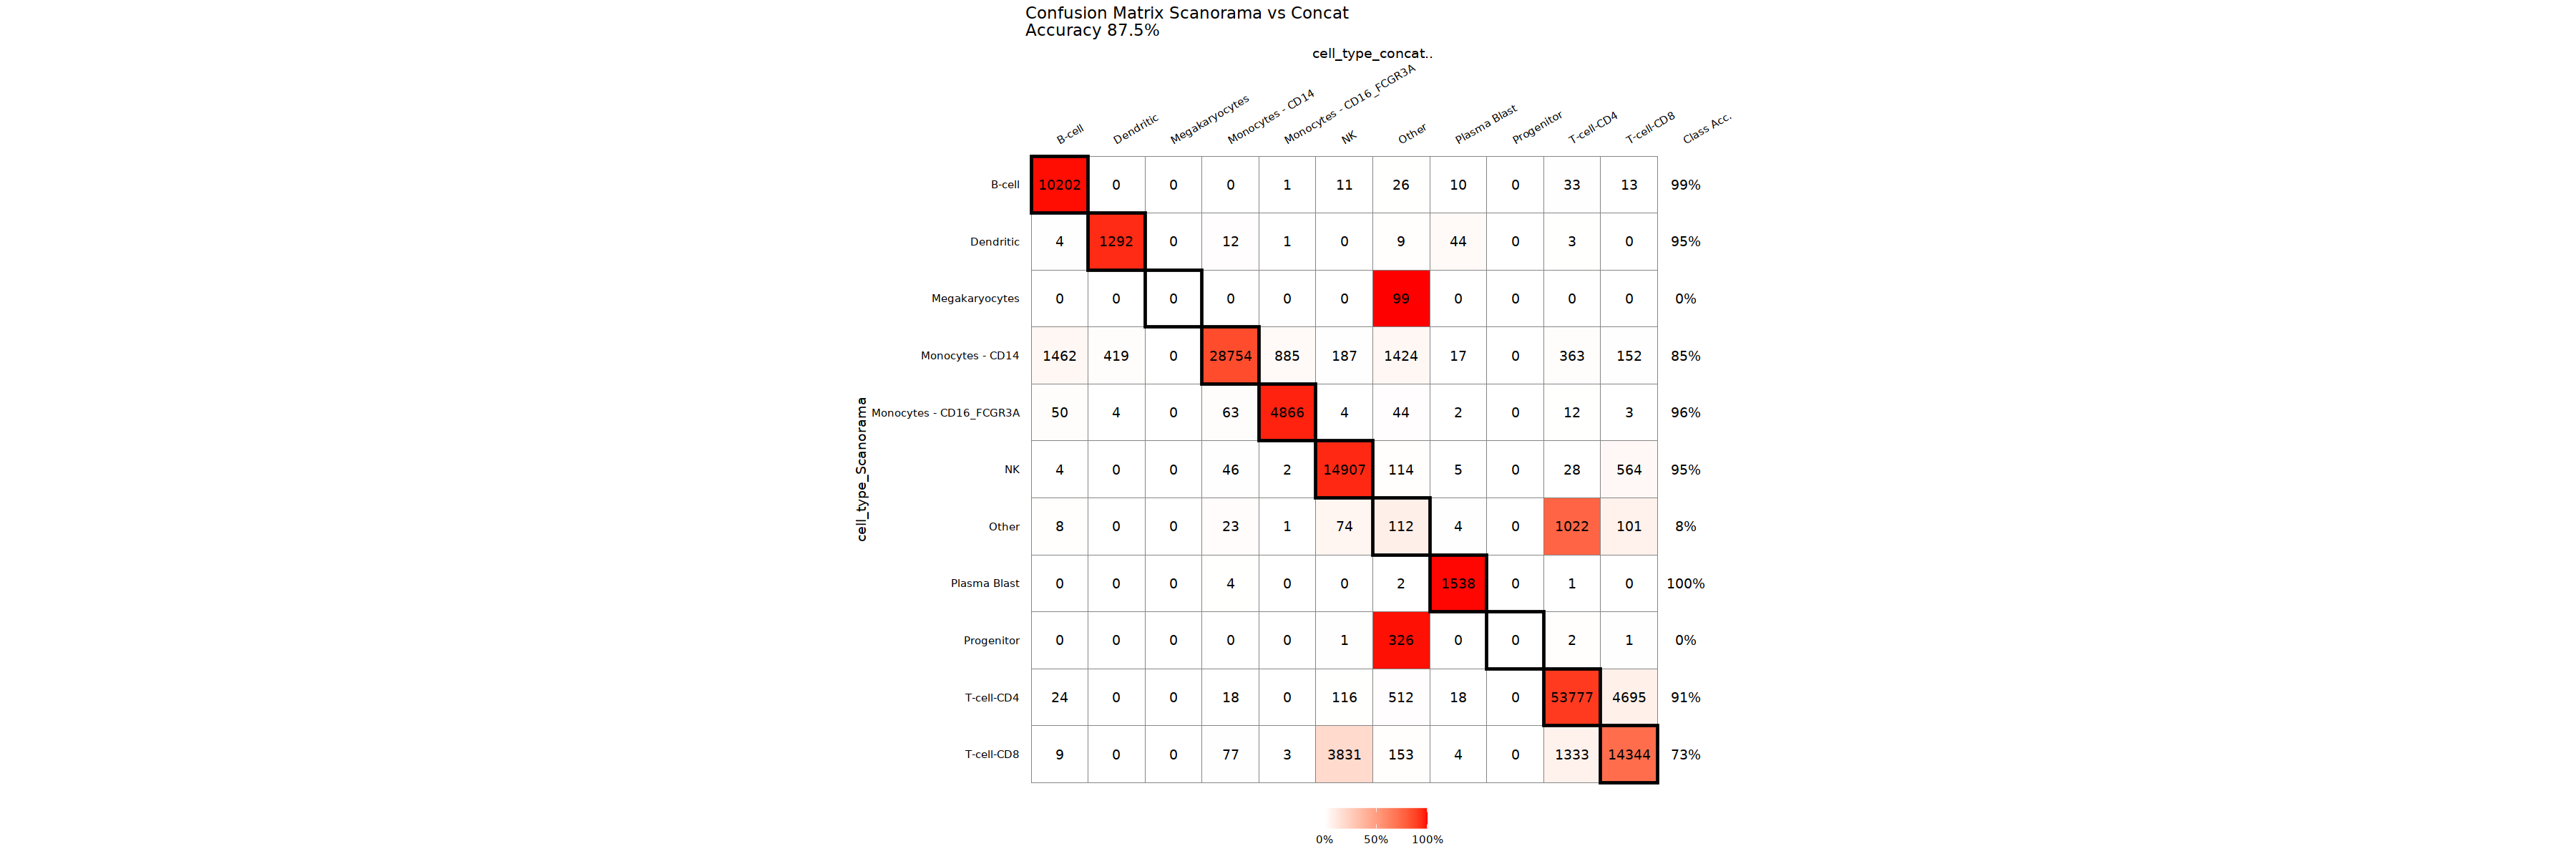

In [112]:
conf_matrix(df.true = data_for_analysis[,reference],df.pred = data_for_analysis[,prediction],true.lab =reference, pred.lab =prediction, title = "Confusion Matrix Scanorama vs Concat")

In [113]:
conf_data = as.data.frame(result$table)

In [114]:
head(conf_data,10)

Prediction              Reference Freq 
1  B-cell                  B-cell    10202
2  Dendritic               B-cell        0
3  Megakaryocytes          B-cell        0
4  Monocytes - CD14        B-cell        0
5  Monocytes - CD16_FCGR3A B-cell        1
6  NK                      B-cell       11
7  Other                   B-cell       26
8  Plasma Blast            B-cell       10
9  Progenitor              B-cell        0
10 T-cell-CD4              B-cell       33

In [115]:
#### Amount of cells being annotated exactly the same

In [116]:
sum(conf_data[conf_data$Prediction == conf_data$Reference , ]$Freq)

[1] 129792

In [117]:
##### Percentage of cells being annotated exactly the same

In [118]:
sum(conf_data[conf_data$Prediction == conf_data$Reference , ]$Freq) / sum(conf_data$Freq)

[1] 0.8753465

In [119]:
#### Analyze large discordances

In [120]:
#### Analyze for prediction clusters

In [121]:
final_result = data.frame()

In [122]:
for (i in 1:nrow(conf_data)){
    #print(paste(conf_data$Prediction[i], 'vs ' ,conf_data$Reference[i] ))
    
    data = data_for_analysis[data_for_analysis[,prediction] == as.character(conf_data$Prediction[i]) &  data_for_analysis[,reference] == as.character(conf_data$Reference[i]) ,] %>% group_by(.dots = prediction_cluster) %>% count()
    data$amount_discordance = data$n
    data_cluster = data_for_analysis %>% group_by(.dots = prediction_cluster) %>% count()
    data_cluster$total_cluster_amount_cells = data_cluster$n
    
    data = merge(data, data_cluster, by = prediction_cluster)
    #difference_cluster[,prediction_cluster] = data_for_analysis[data_for_analysis[,prediction] == as.character(conf_data$Prediction[i]) &  data_for_analysis[,reference] == as.character(conf_data$Reference[i]) ,] %>% group_by(.dots = prediction_cluster) %>% count()
    
    if(nrow(data) > 0){
        difference_cluster = data.frame()
        difference_cluster[1,prediction] =   conf_data$Prediction[i]  
        difference_cluster[1,reference] =  conf_data$Reference[i]

        #print('Cluster Amounts Prediction')
        #print(data_for_analysis[data_for_analysis[,prediction] == as.character(conf_data$Prediction[i]) &  data_for_analysis[,reference] == as.character(conf_data$Reference[i]) ,] %>% group_by(.dots = prediction_cluster) %>% count() )

        result = cbind(difference_cluster, data)
        final_result = rbind(final_result, result)
    }
}

Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been dis

In [123]:
final_result[(final_result$amount_discordance> 500) & (final_result[,prediction] != final_result[,reference]),]

cell_type_concat..      cell_type_Scanorama
31  B-cell                  Monocytes - CD14   
36  Monocytes - CD16_FCGR3A Monocytes - CD14   
40  Other                   Monocytes - CD14   
86  T-cell-CD8              NK                 
98  T-cell-CD4              Other              
136 T-cell-CD8              T-cell-CD4         
137 T-cell-CD8              T-cell-CD4         
142 NK                      T-cell-CD8         
150 T-cell-CD4              T-cell-CD8         
    B2_Concat_Singlet_RB_MT_PCA_100_10_neighbors_cluster n.x 
31   6                                                   1434
36   7                                                    885
40  10                                                   1383
86   4                                                    564
98   0                                                    628
136  4                                                    992
137  9                                                   3703
142  2                                                   3354
150  1                                                    571
    amount_discordance n.y   total_cluster_amount_cells
31  1434                9730  9730                     
36   885                5759  5759                     
40  1383                2321  2321                     
86   564               15953 15953                     
98   628               24209 24209                     
136  992               15953 15953                     
137 3703                3920  3920                     
142 3354               17508 17508                     
150  571               24168 24168

In [124]:
#### Analyze for reference clusters

In [125]:
final_result = data.frame()

In [126]:
for (i in 1:nrow(conf_data)){
    #print(paste(conf_data$Prediction[i], 'vs ' ,conf_data$Reference[i] ))
    
    data = data_for_analysis[data_for_analysis[,prediction] == as.character(conf_data$Prediction[i]) &  data_for_analysis[,reference] == as.character(conf_data$Reference[i]) ,] %>% group_by(.dots = reference_cluster) %>% count()
    data$amount_discordance = data$n
    data_cluster = data_for_analysis %>% group_by(.dots = reference_cluster) %>% count()
    data_cluster$total_cluster_amount_cells = data_cluster$n
    
    data = merge(data, data_cluster, by = reference_cluster)
    #difference_cluster[,prediction_cluster] = data_for_analysis[data_for_analysis[,prediction] == as.character(conf_data$Prediction[i]) &  data_for_analysis[,reference] == as.character(conf_data$Reference[i]) ,] %>% group_by(.dots = prediction_cluster) %>% count()
    
    if(nrow(data) > 0){
        difference_cluster = data.frame()
        difference_cluster[1,prediction] =   conf_data$Prediction[i]  
        difference_cluster[1,reference] =  conf_data$Reference[i]

        #print('Cluster Amounts Prediction')
        #print(data_for_analysis[data_for_analysis[,prediction] == as.character(conf_data$Prediction[i]) &  data_for_analysis[,reference] == as.character(conf_data$Reference[i]) ,] %>% group_by(.dots = prediction_cluster) %>% count() )

        result = cbind(difference_cluster, data)
        final_result = rbind(final_result, result)
    }
}

Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been dis

In [127]:
final_result[(final_result$amount_discordance> 500) & (final_result[,prediction] != final_result[,reference]),]

cell_type_concat.. cell_type_Scanorama B2_Scanorama_Singlet_rb_mt_cluster
21  B-cell             Monocytes - CD14     4                                
34  Other              Monocytes - CD14     4                                
35  Other              Monocytes - CD14     6                                
63  T-cell-CD8         NK                   3                                
70  T-cell-CD4         Other               14                                
105 T-cell-CD8         T-cell-CD4           0                                
106 T-cell-CD8         T-cell-CD4           2                                
107 T-cell-CD8         T-cell-CD4           5                                
112 NK                 T-cell-CD8           1                                
115 T-cell-CD4         T-cell-CD8           1                                
    n.x  amount_discordance n.y   total_cluster_amount_cells
21  1437 1437               14625 14625                     
34   517  517               14625 14625                     
35   782  782               11202 11202                     
63   564  564               15670 15670                     
70  1022 1022                1345  1345                     
105 1206 1206               24806 24806                     
106 2147 2147               19071 19071                     
107 1218 1218               12514 12514                     
112 3831 3831               19754 19754                     
115 1333 1333               19754 19754